---
<a><font color = '#2471A3' size="6">Elo-custome Segmentation</font></a>

---
<a ><font size="4"><b> Problem Statement </b></font></a>

For any payment brand working with Debit and Credit cards payments. These payment methods have partnerships with different merchants in order to offer promotions and discounts to cardholders.They have limitation where the company cannot recommend fully personalize brand recommendation to its customers nor they are able to stop unwanted campaign. The goal is to gain insights into the structure of the data and discover any underlying patterns or relationships that may exist within it, without the use of any labeled data or prior knowledge.


<a ><font size="4"><b> Problem Solution </b></font></a>



<a ><font size="4"><b> Machine Learning Problem Formulation </b></font></a>

- **Target** → Loyalty Score
- **Input Features** → all the existing and engineered features
- **Methods** →  Kmeans, PCA, t-SNE, Apriori
- **Evaluation Metric** → Elbow Method, silhouette Score, Support, and Confidance.

<a ><font size="4"><b> Data Files Information</b></font></a>

- **`userscore.csv`**: contains information about each card id (5 features) and the loyalty score.
- **`historical_transactions.csv`**: this file contains up to 3 months' worth of transactions for every card at any of the provided merchant_id's.
- **`new_merchant_transactions.csv`**: contains the transactions at new merchants (merchant_ids that this particular card_id has not yet visited) over a period of two months.
- **`merchants.csv`**: contains aggregate information for each merchant_id represented in the data set.

<a ><font size="4"><b> Project Pipleline (Workflow)</b></font></a>


<a ><font size="4"><b> Setup and load dependencies</b></font></a>


In [2]:
!pip install matplotlib_venn

  Using cached matplotlib_venn-0.11.9-py3-none-any.whl


In [3]:
!pip install yellowbrick

  Using cached yellowbrick-1.5-py3-none-any.whl (282 kB)


In [4]:
!pip install missingno

  Using cached missingno-0.5.2-py3-none-any.whl (8.7 kB)


In [5]:
!pip install mlxtend

  Using cached mlxtend-0.22.0-py2.py3-none-any.whl (1.4 MB)


In [6]:
!pip install pycaret

  Using cached pycaret-3.0.2-py3-none-any.whl (483 kB)
  Using cached pandas-1.5.3-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.2 MB)
  Using cached pyod-1.0.9-py3-none-any.whl
  Using cached imbalanced_learn-0.10.1-py3-none-any.whl (226 kB)
  Using cached category_encoders-2.6.1-py2.py3-none-any.whl (81 kB)
  Using cached lightgbm-3.3.5-py3-none-manylinux1_x86_64.whl (2.0 MB)
  Using cached deprecation-2.1.0-py2.py3-none-any.whl (11 kB)
  Using cached xxhash-3.2.0-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (212 kB)
  Using cached scikit_plot-0.3.7-py3-none-any.whl (33 kB)
  Using cached kaleido-0.2.1-py2.py3-none-manylinux1_x86_64.whl (79.9 MB)
  Using cached schemdraw-0.15-py3-none-any.whl (106 kB)
  Using cached plotly_resampler-0.8.3.2-cp39-cp39-manylinux_2_35_x86_64.whl
  Using cached sktime-0.17.0-py3-none-any.whl (16.1 MB)
  Using cached tbats-1.1.3-py3-none-any.whl (44 kB)
  Using cached pmdarima-2.0.3-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_

In [1]:
import os
import gc
import datetime
import pandas as pd
import numpy as np

# statistics
import statsmodels.api as sm
from statsmodels.stats.power import TTestIndPower, TTestPower
from scipy.stats import skew, norm, kurtosis, spearmanr
from scipy import stats
import statistics

# for ploting
from matplotlib import cm
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from sklearn.metrics import silhouette_samples

from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.decomposition import PCA
# from yellowbrick.cluster import KElbowVisualizer
from IPython.core.interactiveshell import InteractiveShell

In [2]:
import warnings
from sklearn.exceptions import ConvergenceWarning, DataConversionWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings('ignore', category=DataConversionWarning)
warnings.filterwarnings('ignore', category=UserWarning)

In [3]:
# use the following to suppress scientific notation in Pandas
pd.options.display.float_format = '{:,.4f}'.format
pd.options.display.precision = 0

# Set the maximum number of rows and columns to display
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

sns.set_context('talk')
InteractiveShell.ast_node_interactivity = "all"

colors = sns.cubehelix_palette(20,reverse = True, light= 0.01,dark = 0.5, gamma= 0.7)
palette_color  = sns.color_palette("RdBu",20)
sns.set_theme(style="whitegrid", palette=palette_color)

colors
palette_color

[(0.5423298731257209, 0.044290657439446365, 0.1437139561707036),
 (0.6807381776239907, 0.08858131487889273, 0.16585928489042678),
 (0.7561707035755478, 0.21038062283737025, 0.22352941176470587),
 (0.8226066897347174, 0.34325259515570933, 0.28627450980392155),
 (0.8807381776239908, 0.4719723183391003, 0.3753171856978085),
 (0.940715109573241, 0.6099192618223759, 0.4812764321414839),
 (0.9686274509803922, 0.7176470588235293, 0.5999999999999999),
 (0.9852364475201846, 0.8173010380622837, 0.7273356401384083),
 (0.9856978085351787, 0.8889657823913879, 0.8320645905420992),
 (0.9746251441753172, 0.940638216070742, 0.9206459054209919),
 (0.930642060745867, 0.9506343713956171, 0.9616301422529796),
 (0.8605151864667436, 0.9174163783160324, 0.9487120338331411),
 (0.7711649365628607, 0.8734332948865823, 0.9273356401384084),
 (0.654901960784314, 0.8143790849673205, 0.8941176470588236),
 (0.530026912725875, 0.7456362937331797, 0.8560553633217994),
 (0.37208765859284904, 0.6456747404844292, 0.8020761245674741),
 (0.24705882352941178, 0.5557093425605536, 0.7540945790080738),
 (0.1843137254901961, 0.47266435986159167, 0.7116493656286044),
 (0.1229527104959631, 0.3875432525951557, 0.6572087658592849),
 (0.071280276816609, 0.2878892733564014, 0.518800461361015)]

---
<h1 style="text-align:center;"><font color = "#2471A3">FUNCTIONS</font></h1>

---

In [4]:
# crdits: https://www.kaggle.com/fabiendaniel/elo-world
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df.dtypes

In [5]:
def CheckMissing(df):
    missing = df.isna().sum().sort_values(ascending = False)
    missing = missing[missing > 0]
    if missing.sum()!=0:
        missing_percent = missing / len(df) * 100

        missing_df = pd.DataFrame({
            'Feature': missing.index,
            'NumMissing': missing.values,
            'PercentMissing':missing_percent.values,
            'NumUnique': df[missing.index].nunique().values,
            'MostCommon': df[missing.index].mode().iloc[0].values
        })
        return missing_df
    else:
        print("Dataset has No Nulls")
        return 0

In [6]:
def IQROutlierCheck(df, col):

    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q1 + 1.5 * IQR
    critic_score_outliers = df[(df[col] < lower) | (df[col] > upper)]

    return critic_score_outliers

In [7]:
def OutliersInfo(df, cols):

    outlier_dict=dict()
    for col in cols:
        print(f"\n{col}")
        print("-"*35)
        critic_outliers = IQROutlierCheck(df, col)
        outlier_dict[col] = critic_outliers.index
        n = critic_outliers[col].shape[0]
        print(f"Number of outlier samples produced by IQR is {n}")
        if n !=0:
            for i in range(0, 2):
                print("{}% percentile value is {:3.3f}".format(i, np.percentile(df[col], i)))
            for i in range(98, 101):
                print("{}% percentile value is {:3.3f}".format(i, np.percentile(df[col], i)))

            percent = np.percentile(df[col], 1)
            count = len(df[df[col]<percent])
            print(f"\n\t- Number of values less than {percent} is {count}")
            percent = np.percentile(df[col], 99)
            count = len(df[df[col]>percent])
            print(f"\t- Number of values greater than {percent} is {count}")

<a ><font size="5"><b>Descriptive statistics</b></font></a>

Here are some common descriptive statistics measures:

- Measures of central tendency: Mean, Median, and Mode.
- Measures of variability: Variance, Standard deviation, and Range.
- Measures of shape:
    - Skewness: the degree of asymmetry of the data.
    - Kurtosis: the degree of peakedness or flatness of the data.

In [8]:
def DescriptiveStats(df):
    stats_df = df.describe(include = 'all').transpose()
    stats_df['skewness'] = np.nan
    stats_df['kurtosis'] = np.nan
    for col in df.select_dtypes([np.number]).columns.to_list():

        stats_df.loc[col,'unique'] = df[col].nunique()
        stats_df.loc[col,'top'] = df[col].mode()[0]
        stats_df.loc[col,'freq'] = df[col].value_counts().values[0]
        stats_df.loc[col,'skewness'] = df[col].skew()
        stats_df.loc[col,'kurtosis'] = df[col].kurtosis()

    return stats_df

In [420]:
def n_cat_samples(df,cat_cols,num_bins=20, figsize=(10, 20)):

    InteractiveShell.ast_node_interactivity = 'last_expr'

    fig, axs = plt.subplots(nrows=len(cat_cols)+1, ncols=2, figsize=figsize)
    palette_color  = sns.color_palette("RdBu",5)

    # Create a pie plot for each categorical column
    for i, feature in enumerate(cat_cols):

        value_counts = df[feature].value_counts().sort_values()

        axs[i, 0].pie(value_counts, labels=value_counts.index,
                        colors=palette_color, autopct='%1.1f%%', pctdistance=1.2,
                        labeldistance=1.5, textprops={'fontsize': 10})

        sns.countplot(x=feature, data=df,ax=axs[i, 1],palette=palette_color)

        axs[i, 0].set_title(feature, loc='left',fontsize=14, pad = 30)
        axs[i, 1].set_xlabel('', fontsize=12, rotation= 60)
        axs[i, 1].set_ylabel('', fontsize=12)

    axs[-1,0].remove()
    axs[-1,1].remove()

    plt.tight_layout(h_pad =0.5, pad=0.5)
    plt.show()

In [10]:
def QQplot(df, cols, n=3, figsize=(15,7), sharex = False):
    InteractiveShell.ast_node_interactivity = 'last_expr'
    rows = (len(cols)-1)//n
    fig, axs = plt.subplots(rows+1 ,n, figsize=figsize, sharex = sharex)
    for i, col in enumerate(cols):
        ax = axs[i//n,i%n]
        stats.probplot(df[col], dist="norm", plot =ax)
        ax.tick_params(axis='both', labelsize=7)
        ax.set_title(f"QQ plot of {col}", fontsize = 10)
        ax.tick_params(axis='both', labelsize=6)
        ax.set_xlabel('')
        ax.set_ylabel('')

        # Add skewness and kurtosis values to the plot
        skew = df[col].skew()
        kurtosis = df[col].kurtosis()
        textstr = f"Skewness: {skew:.2f}\nKurtosis: {kurtosis:.2f}"
        props = dict(boxstyle='round', facecolor='white', alpha=0.5)
        axs[i//n,i%n].text(0.05, 0.95, textstr, transform=ax.transAxes,
                           fontsize=10, verticalalignment='top', bbox=props)
    # Remove any empty figures
    for i in range(len(cols), (rows + 1) * n):
        row, col_idx = divmod(i, n)
        fig.delaxes(axs[row, col_idx])

    plt.tight_layout(pad = 1.5, h_pad=0.3)
    plt.show()

In [11]:
def Histplot(df, cols, n=3, figsize=(15,7), sharex=False):
    InteractiveShell.ast_node_interactivity = 'last_expr'
    rows = (len(cols)-1)//n
    fig, axs = plt.subplots(rows+1 ,n, figsize=figsize, sharex = sharex)
    for i, col in enumerate(cols):
        ax = axs[i//n,i%n]
        ax.hist(df[col], bins=20)
        ax.tick_params(axis='both', labelsize=7)
        ax.set_xticks(ax.get_xticks()[::2])
        ax.set_yticks(ax.get_yticks()[::2])
        ax.set_title(f"Histogram of {col}", fontsize=10)
        ax.set_xlabel('')
        ax.set_ylabel('')

        # Add skewness and kurtosis values to the plot
        skew = df[col].skew()
        kurtosis = df[col].kurtosis()
        textstr = f"Skewness: {skew:.2f}\nKurtosis: {kurtosis:.2f}"
        props = dict(boxstyle='round', facecolor='white', alpha=0.5)
        ax.text(0.05, 0.95, textstr, transform=ax.transAxes,
                           fontsize=9, verticalalignment='top', bbox=props)

    # Remove any empty figures
    for i in range(len(cols), (rows + 1) * n):
        row, col_idx = divmod(i, n)
        fig.delaxes(axs[row, col_idx])

    plt.tight_layout(pad = 1.5, h_pad=0.3)
    plt.show()

In [12]:
# credit: https://www.kaggle.com/code/brendanhasz/elo-feature-engineering-and-feature-selection/notebook
def Remove_Non_nformative(df):
    """Remove non-informative columns (all NaNs, all zeros,
    or only 1 unique value, except for columns with only 'Y' and 'N' values)"""
    for col in df:
        if df[col].isnull().all():
            print('Removing '+col+ '(all NaN)')
            del df[col]
        if df[col].nunique() == 1:
            print('Removing '+col+' (only 1 unique value)')
            del df[col]
        if df[col].nunique() >= 0.8*(len(df)):
            print('Removing '+col+' (as all values are unique)')
            del df[col]

In [13]:
def Matching_percentage(df, col1, col2):
    matching_rows = df[(df[col1] == df[col2])]
    return len(matching_rows) / len(df) * 100

---
<h1 style="text-align:center;"><font color = "#2471A3">LOAD AND MERGE DATASET</font></h1>

---

In [14]:
base_file = os.getcwd()
merch_df = pd.read_csv(os.path.join(base_file, "merchants.csv"))
new_merch_tran_df = pd.read_csv(os.path.join(base_file, "new_merchant_transactions.csv"))
hist_tran_df = pd.read_csv(os.path.join(base_file, "historical_transactions.csv"))
userscore_df = pd.read_csv(os.path.join(base_file, "userscore.csv"))

In [15]:
reduce_mem_usage(merch_df)
reduce_mem_usage(new_merch_tran_df)
reduce_mem_usage(hist_tran_df)
reduce_mem_usage(userscore_df)

Mem. usage decreased to 30.32 Mb (46.0% reduction)


merchant_id                     object
merchant_group_id                int32
merchant_category_id             int16
subsector_id                      int8
numerical_1                    float16
numerical_2                    float16
category_1                      object
most_recent_sales_range         object
most_recent_purchases_range     object
avg_sales_lag3                 float32
avg_purchases_lag3             float64
active_months_lag3                int8
avg_sales_lag6                 float32
avg_purchases_lag6             float64
active_months_lag6                int8
avg_sales_lag12                float32
avg_purchases_lag12            float64
active_months_lag12               int8
category_4                      object
city_id                          int16
state_id                          int8
category_2                     float16
dtype: object

Mem. usage decreased to 114.20 Mb (45.5% reduction)


authorized_flag          object
card_id                  object
city_id                   int16
category_1               object
installments              int16
category_3               object
merchant_category_id      int16
merchant_id              object
month_lag                  int8
purchase_amount         float16
purchase_date            object
category_2              float16
state_id                   int8
subsector_id               int8
dtype: object

Mem. usage decreased to 1749.11 Mb (43.7% reduction)


authorized_flag          object
card_id                  object
city_id                   int16
category_1               object
installments              int16
category_3               object
merchant_category_id      int16
merchant_id              object
month_lag                  int8
purchase_amount         float32
purchase_date            object
category_2              float16
state_id                   int8
subsector_id               int8
dtype: object

Mem. usage decreased to  4.04 Mb (56.2% reduction)


card_id                object
first_active_month     object
feature_1                int8
feature_2                int8
feature_3                int8
score                 float16
dtype: object

### Quick Handling the Transactional data

In [16]:
transactions = pd.concat([new_merch_tran_df, hist_tran_df], axis = 0)
transactions.shape

(31075392, 14)

In [17]:
del hist_tran_df, new_merch_tran_df

### Duplication in Merchant data

In [18]:
all_ids = merch_df.merchant_id.shape[0]
unique_ids = merch_df.merchant_id.unique().shape[0]
print("Number of merchant_id \t\t=",all_ids)
print("Number of unique merchant_id\t=",unique_ids)
print("Number of duplicated samples\t=",all_ids - unique_ids)

Number of merchant_id 		= 334696
Number of unique merchant_id	= 334633
Number of duplicated samples	= 63


In [18]:
merch_df.drop_duplicates(subset=['merchant_id'], inplace=True)

Number of Merchant ID in Transactions: 334633
Number of Merchant ID in Merchant: 334633


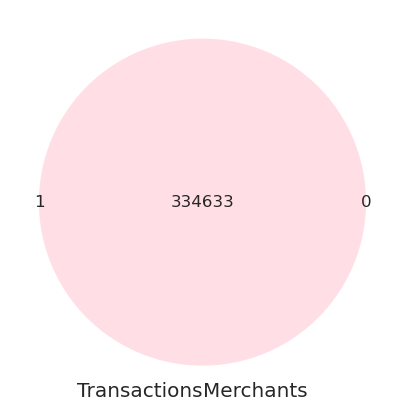

In [21]:
from matplotlib_venn import venn2
plt.figure(figsize=(5,5))

ids1 = set(transactions['merchant_id'].values)
ids2 = set(merch_df['merchant_id'].values)
print(f"Number of Merchant ID in Transactions: {transactions['merchant_id'].nunique()}")
print(f"Number of Merchant ID in Merchant: {merch_df['merchant_id'].nunique()}")

venn2([ids1, ids2],set_labels = ('Transactions', 'Merchants'),set_colors=palette_color[2::10], alpha=0.5);

In [19]:
merch_df.rename(columns={'category_1':'merchant_category_1',
                        'category_2':'merchant_category_2',
                        'category_4':'merchant_category_3',
                        'numerical_1':'merchant_numerical_1',
                        'numerical_2':'merchant_numerical_2',
                        'subsector_id': 'merchant_subsector_id' ,
                        'state_id': 'merchant_state_id',
                        'city_id': 'merchant_city_id'}, inplace = True)

transactions.rename(columns={'category_1':'transaction_category_1',
                             'category_2':'transaction_category_2',
                             'category_3':'transaction_category_3',
                             'subsector_id': 'transaction_subsector_id' ,
                             'state_id': 'transaction_state_id',
                             'city_id': 'transaction_city_id'}, inplace = True)

In [20]:
transactions.shape
temp_df = pd.merge(transactions, merch_df, on = ['merchant_id'], how = 'left')
temp_df.shape

(31075392, 14)

(31075392, 35)

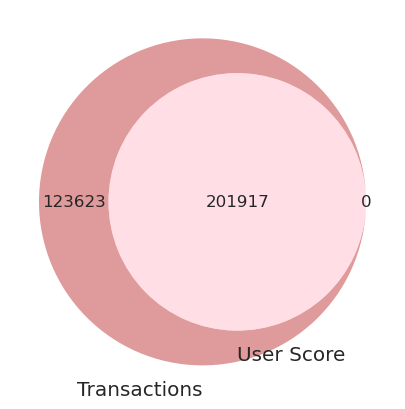

In [24]:
plt.figure(figsize=(5,5))

ids1 = set(temp_df['card_id'].values)
ids2 = set(userscore_df['card_id'].values)
venn2([ids1, ids2],set_labels = ('Transactions', 'User Score'),set_colors=palette_color[2::10], alpha=0.5);

In [21]:
merged_df = pd.merge(userscore_df, temp_df, on = 'card_id', how = 'inner')
merged_df.shape

(19249694, 40)

In [22]:
del userscore_df, merch_df

---
<h1 style="text-align:center;"><font color = "#2471A3">DATA PREPARATION</font></h1>

---

---
## **Select Relevant Features**

---

In [23]:
InteractiveShell.ast_node_interactivity = 'all'

Matching_percentage(merged_df, 'transaction_city_id','merchant_city_id')
Matching_percentage(merged_df, 'transaction_state_id','merchant_state_id')
Matching_percentage(merged_df, 'transaction_subsector_id','merchant_subsector_id')
Matching_percentage(merged_df, 'merchant_category_id_x','merchant_category_id_y')
Matching_percentage(merged_df, 'transaction_category_1','merchant_category_1')
Matching_percentage(merged_df, 'transaction_category_2','merchant_category_2')
Matching_percentage(merged_df, 'transaction_category_3','merchant_category_3')

72.7410160390082

88.91307051426377

90.26432316274742

86.3323229969266

92.82541841963825

81.22949902476371

0.0

In [24]:
cols = ['active_months_lag12','active_months_lag3','active_months_lag6']
for col in cols:
    merged_df[col].value_counts().head(10)

12.0000    18103985
7.0000       731872
10.0000      117308
9.0000        64130
8.0000        49281
11.0000       46521
6.0000        12238
5.0000         8481
4.0000         5323
3.0000         4387
Name: active_months_lag12, dtype: int64

3.0000    19143526
2.0000        2126
1.0000        1745
Name: active_months_lag3, dtype: int64

6.0000    19125335
5.0000        8481
4.0000        5323
3.0000        4387
2.0000        2126
1.0000        1745
Name: active_months_lag6, dtype: int64

<a ><font size="3"><b>OBSERVATION:</b></font></a>
-  `active_months_lag3`, `active_months_lag6`, `avg_sales_lag3`, `avg_sales_lag6`, `avg_purchases_lag3`, and `avg_purchases_lag6` are redundant features.
    - **Action:** Remove them

In [23]:
to_drop = ['transaction_city_id','transaction_state_id','transaction_subsector_id','transaction_category_1','transaction_category_2',
           'merchant_category_id_x','avg_sales_lag3','avg_sales_lag6','avg_purchases_lag3','avg_purchases_lag6','active_months_lag3','active_months_lag6',]
merged_df = merged_df.drop(to_drop, axis = 1)

In [24]:
len(merged_df.columns)

28

### Spearman Correlation
The Spearman correlation coefficient is a measure of the strength and direction of the association between two variables. It is a non-parametric measure, which means that it does not make any assumptions about the distribution of the variables being correlated. Instead, it measures the degree to which the ranks of the two variables are related.

- The Spearman correlation coefficient is denoted by the symbol ρ (rho) and can take values between -1 and 1, with -1 indicating a perfect negative correlation, 0 indicating no correlation, and 1 indicating a perfect positive correlation.
- The formula: $$ρ = 1 - 6 \sum{\frac{d^2}{N(N^2-1)}}$$



Where:

* ρ is the correlation coefficient
* Σ is the sum of
* d² is the squared difference between two values
* N is the number of observations

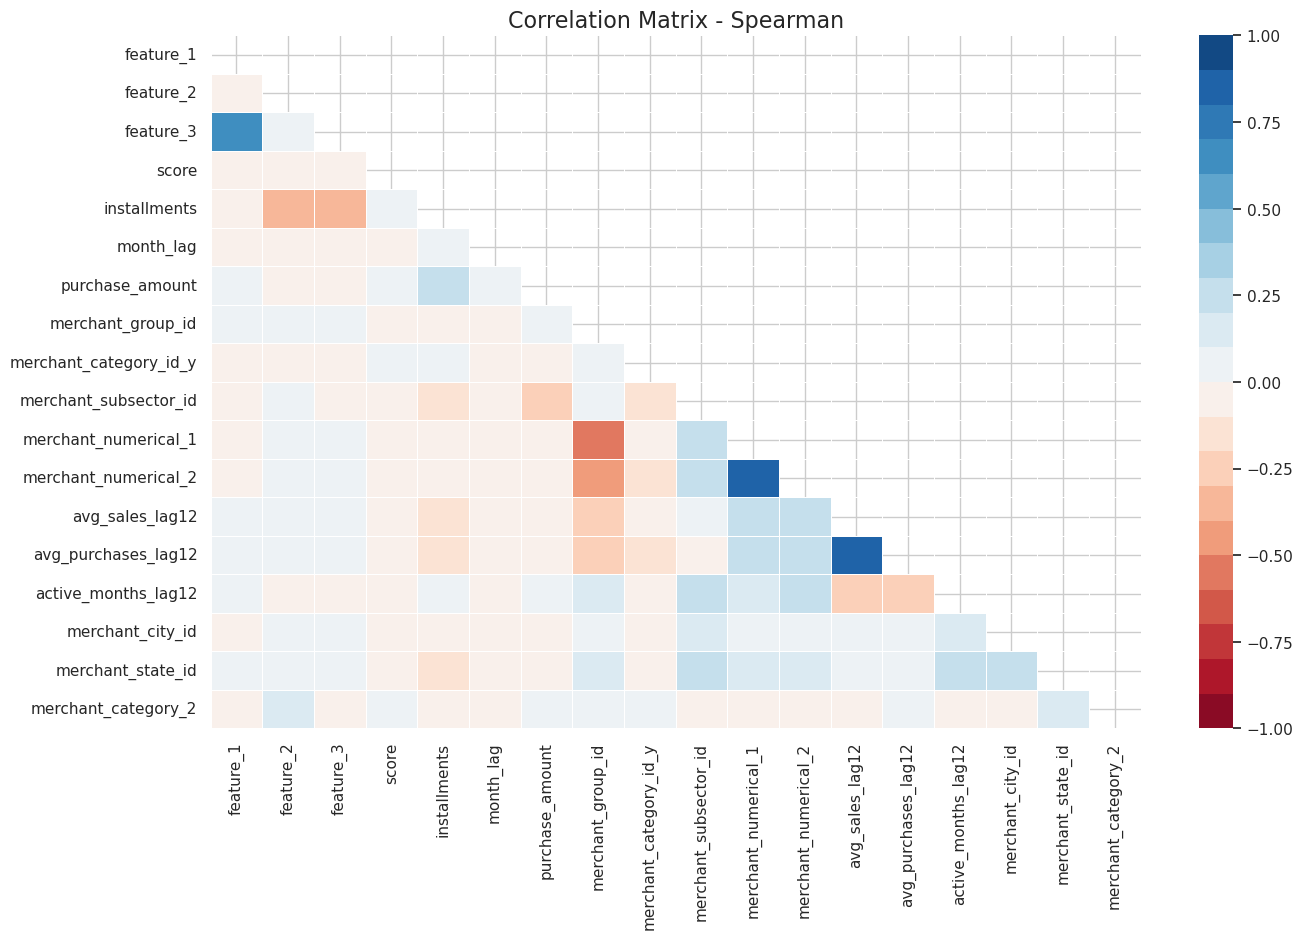

In [53]:
spearman_corr = merged_df.corr(method='spearman', numeric_only= True)
spearman_corr
plt.figure(figsize=(15,9))

mask = np.triu(np.ones_like(spearman_corr, dtype=bool))
sns.heatmap(spearman_corr,
           vmin=-1, vmax=1,
           cmap= palette_color,
           linewidths=.5,
           linecolor='white',
           mask=mask,)

plt.title('Correlation Matrix - Spearman', fontsize=16);

<a ><font size="3"><b>OBSERVATION:</b></font></a>

- `feature_1` is positively correlated with `feature_3` (0.6229).
- `feature_2` is negatively correlated with `installments` (-0.3337).
- `merchant_numerical_1` and `merchant_numerical_2` are highly positively correlated (0.8175).
- `avg_sales_lag12` and `avg_purchases_lag12` are highly positively correlated (0.8834).

In [25]:
Matching_percentage(merged_df, 'feature_1','feature_3')
Matching_percentage(merged_df, 'avg_sales_lag12','avg_purchases_lag12')

0.0

0.010207954474497101

In [27]:
DescriptiveStats(merged_df[['feature_3','merchant_numerical_2','avg_sales_lag12','avg_purchases_lag12']])

,count,mean,std,min,25%,50%,75%,max,skewness,kurtosis,unique,top,freq
feature_3,"19,249,694.0000",0.5518,0.4973,0.0000,0.0000,1.0000,1.0000,1.0000,-0.2084,-1.9566,2.0000,1.0000,"10,622,436.0000"
merchant_numerical_2,"19,147,397.0000",NaN,0.0000,-0.0575,-0.0575,-0.0575,0.0615,182.1250,NaN,NaN,938.0000,-0.0575,"10,344,553.0000"
avg_sales_lag12,"19,141,554.0000",112.1645,"9,201.0820",-82.1300,0.9500,1.0500,1.1900,"2,567,408.0000",107.2590,"17,068.8008","4,746.0000",8.5700,"705,094.0000"
avg_purchases_lag12,"19,147,397.0000",inf,NaN,0.0983,0.9737,1.0610,1.1830,inf,NaN,NaN,"170,728.0000",16.2198,"704,948.0000"


In [26]:
merged_df = merged_df.drop(['feature_3','merchant_numerical_2','avg_sales_lag12'], axis=1)

---
## **Handling Noisy data**

---

In [27]:
merged_df = merged_df.rename(columns = {'merchant_category_id_y':'merchant_category_id'})

In [71]:
InteractiveShell.ast_node_interactivity = 'all'

np.isinf(merged_df['avg_purchases_lag12']).sum()
merged_df = merged_df.replace([np.inf, -np.inf], np.nan)
np.isinf(merged_df['avg_purchases_lag12']).sum()

0

0

In [28]:
merged_df.merchant_numerical_1.describe()

count   19,147,397.0000
mean                NaN
std              0.0000
min             -0.0575
25%             -0.0575
50%             -0.0376
75%              0.3291
max            183.7500
Name: merchant_numerical_1, dtype: float64

<a ><font size="3"><b>OBSERVATION:</b></font></a> The variable may not be very informative. Because all of the values in the variable are **almost** equally likely.

In [29]:
merged_df['merchant_numerical_1_bins'] = pd.qcut(merged_df['merchant_numerical_1'],  q= 40, duplicates='drop')
merged_df['merchant_numerical_1_bins'] = merged_df['merchant_numerical_1_bins'].cat.codes.replace(-1, np.nan)

In [30]:
merged_df['merchant_numerical_1_bins'].value_counts()

0.0000     8990633
1.0000     1060152
2.0000      664791
8.0000      552480
6.0000      534883
5.0000      530927
18.0000     484218
12.0000     480352
16.0000     480107
13.0000     477921
14.0000     477114
20.0000     476998
17.0000     476472
11.0000     476014
15.0000     475361
19.0000     474814
3.0000      454786
10.0000     445255
9.0000      420685
7.0000      368795
4.0000      344639
Name: merchant_numerical_1_bins, dtype: int64

In [56]:
del merged_df['merchant_numerical_1']

In [31]:
InteractiveShell.ast_node_interactivity = 'all'
merged_df['installments'].value_counts()
merged_df['merchant_city_id'].value_counts()
merged_df['merchant_state_id'].value_counts()

 0      10125067
 1       7742317
 2        447533
 3        361868
-1        145197
 4        119966
 6         88715
 10        79540
 5         77981
 12        35736
 8         13833
 7          7416
 9          3858
 11          560
 999         107
Name: installments, dtype: int64

-1.0000     6589044
69.0000     2273285
158.0000     681694
17.0000      615221
88.0000      401965
             ...   
178.0000       2572
330.0000       2349
92.0000         598
286.0000         94
320.0000         57
Name: merchant_city_id, Length: 271, dtype: int64

9.0000     5921556
-1.0000    2835181
16.0000    1437302
15.0000    1351230
5.0000     1060414
19.0000     814094
20.0000     714506
22.0000     615657
21.0000     605869
4.0000      574265
13.0000     425260
11.0000     421651
7.0000      409330
14.0000     268452
12.0000     260037
2.0000      235473
24.0000     229101
3.0000      185307
18.0000     172440
10.0000     142497
1.0000      124398
23.0000     123522
8.0000      105567
17.0000      65898
6.0000       48390
Name: merchant_state_id, dtype: int64

<a ><font size="3"><b>OBSERVATION:</b></font></a>
- Replacing -1 with nulls in `merchant_state_id` and `merchant_city_id `.
- Replacing -1 and 999 with nulls in `installments`. 
- In many cases, these values may represent missing or invalid data points, so imputing them with nulls can help to ensure that they are not used in subsequent analysis. 
- I will choose an appropriate imputation method to fill in any missing values.


In [32]:
merged_df['installments'] = merged_df['installments'].replace([-1,999], np.nan)
merged_df['merchant_state_id'] = merged_df['merchant_state_id'].replace(-1, np.nan)
merged_df['merchant_city_id'] = merged_df['merchant_city_id'].replace(-1, np.nan)

---
## **Encode Features**

---

In [33]:
def Encoding(df, cols):
    float16_cols = df.select_dtypes('float16').columns

    for col in float16_cols:
        df[col] = df[col].astype(float)

    for col in cols:
        df[col] = df[col].map({'Y': 1, 'N': 0}).fillna(df[col])

    df['most_recent_sales_range'] = df['most_recent_sales_range'].map({'A':5, 'B':4, 'C':3, 'E':2, 'D':1}).fillna(df['most_recent_sales_range'])
    df['most_recent_purchases_range'] = df['most_recent_purchases_range'].map({'A':5, 'B':4, 'C':3, 'E':2, 'D':1}).fillna(df['most_recent_purchases_range'])
    df['transaction_category_3'] = df['transaction_category_3'].map({'A': 3, 'B': 2, 'C': 1}).fillna(df['transaction_category_3'])
    return df

In [34]:
cols = ['authorized_flag', 'merchant_category_1','merchant_category_3']
merged_df = Encoding(merged_df, cols)
merged_df.head(3)

,card_id,first_active_month,feature_1,feature_2,score,authorized_flag,installments,transaction_category_3,merchant_id,month_lag,purchase_amount,purchase_date,merchant_group_id,merchant_category_id,merchant_subsector_id,merchant_numerical_1,merchant_category_1,most_recent_sales_range,most_recent_purchases_range,avg_purchases_lag12,active_months_lag12,merchant_category_3,merchant_city_id,merchant_state_id,merchant_category_2,merchant_numerical_1_bins
0,C_ID_92a2005557,Jun-17,5,2,-0.8203,1,0.0000,3.0000,M_ID_98b342c0e3,1,-0.4915,2018-03-30 10:30:32,35.0000,80.0000,37.0000,183.7500,0.0000,5.0000,5.0000,1.2613,12.0000,0.0000,NaN,9.0000,1.0000,20.0000
1,C_ID_92a2005557,Jun-17,5,2,-0.8203,1,0.0000,3.0000,M_ID_28a21ea733,2,-0.6665,2018-04-06 10:55:08,"45,545.0000",80.0000,37.0000,-0.0575,0.0000,2.0000,1.0000,0.8214,5.0000,1.0000,69.0000,9.0000,1.0000,0.0000
2,C_ID_92a2005557,Jun-17,5,2,-0.8203,1,0.0000,3.0000,M_ID_20dce166b9,1,-0.6353,2018-03-29 15:38:10,"16,785.0000",278.0000,37.0000,-0.0575,0.0000,3.0000,3.0000,1.1549,12.0000,0.0000,NaN,9.0000,1.0000,0.0000


---
## **Check Missing Values**

---

In [58]:
missing_df = CheckMissing(merged_df)
missing_df

,Feature,NumMissing,PercentMissing,NumUnique,MostCommon
0,merchant_city_id,6691341,34.7608,270,69.0000
1,merchant_category_2,2937478,15.2599,5,1.0000
2,merchant_state_id,2937478,15.2599,24,9.0000
3,installments,145304,0.7548,13,0.0000
4,transaction_category_3,145197,0.7543,3,3.0000
5,merchant_group_id,102297,0.5314,107779,35.0000
6,merchant_subsector_id,102297,0.5314,40,33.0000
7,merchant_category_3,102297,0.5314,2,1.0000
8,active_months_lag12,102297,0.5314,12,12.0000
9,avg_purchases_lag12,102297,0.5314,170728,16.2198


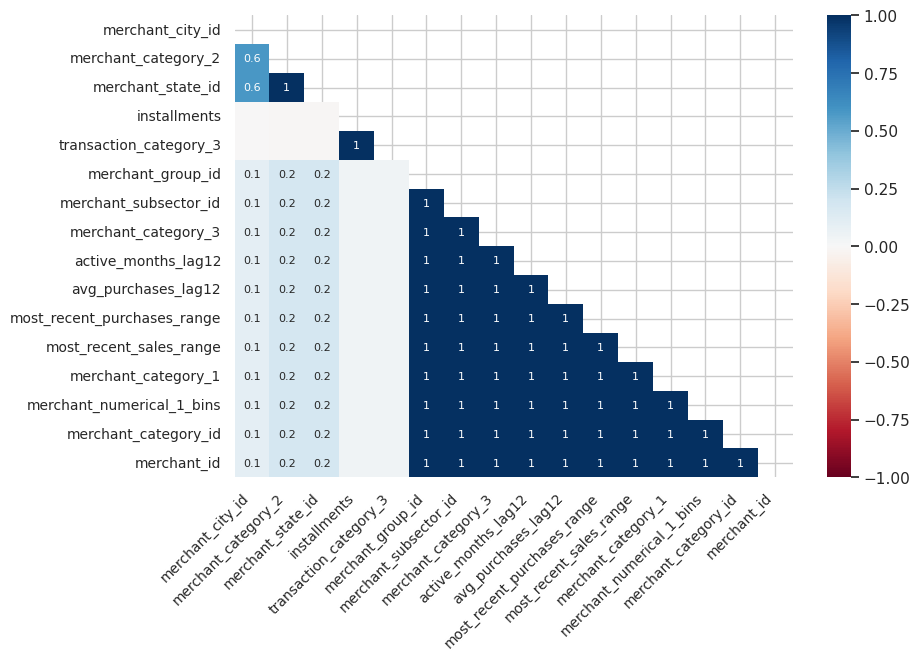

In [59]:
msno.heatmap(merged_df[missing_df.Feature], figsize=(9,6), fontsize=10);

<Axes: >

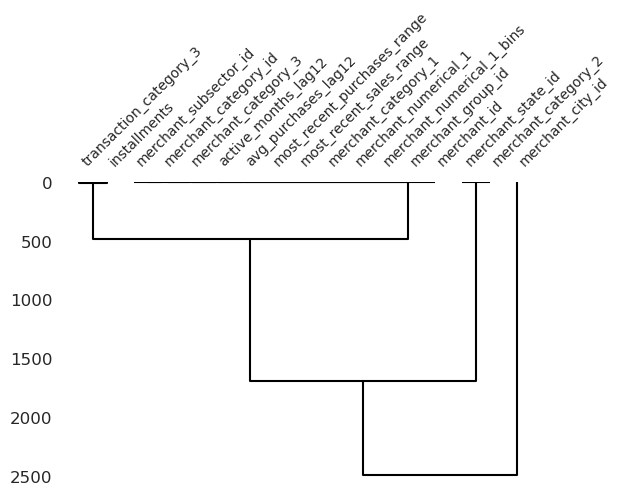

In [38]:
msno.dendrogram(merged_df[missing_df.Feature], figsize=(6,4), fontsize=10)

<a ><font size="3"><b>OBSERVATION:</b></font></a>
Most of columns are Nulls as some transactions in both the `new_merchant_transactions` and `historical_transactions` were nulls before merging. This suggests the missingness is not completely random (MNAT) and is likely related to the values themselves as the missingness is correlated with the unobserved values.

---
## **Imputation**

---

### Impute `merchant_id` in `transactions`
Impute missing `merchant_id` with the mode of the `merchant_id` in this `card_id`

In [73]:
merch_mode_by_card_df = merged_df.groupby('card_id').agg({'merchant_id':[statistics.mode],}).reset_index()
merch_mode_by_card_df.columns = ['card_id','merchant_id_mode']

merged_df = pd.merge(merged_df, merch_mode_by_card_df, how='left', on = 'card_id')
merged_df[['card_id','merchant_id', 'merchant_id_mode']]

,card_id,merchant_id,merchant_id_mode
0,C_ID_92a2005557,M_ID_98b342c0e3,M_ID_1a81c358a3
1,C_ID_92a2005557,M_ID_28a21ea733,M_ID_1a81c358a3
2,C_ID_92a2005557,M_ID_20dce166b9,M_ID_1a81c358a3
3,C_ID_92a2005557,M_ID_f7796994d1,M_ID_1a81c358a3
4,C_ID_92a2005557,M_ID_0703c10cc0,M_ID_1a81c358a3
...,...,...,...
19249689,C_ID_92c9984c58,M_ID_49d4a8510e,M_ID_e5374dabc0
19249690,C_ID_92c9984c58,M_ID_e5374dabc0,M_ID_e5374dabc0
19249691,C_ID_92c9984c58,M_ID_e5374dabc0,M_ID_e5374dabc0
19249692,C_ID_92c9984c58,M_ID_ec24d672a3,M_ID_e5374dabc0


In [74]:
merged_df['merchant_id'] = merged_df['merchant_id'].fillna(merged_df['merchant_id_mode'])

In [75]:
del merged_df['merchant_id_mode'], merch_mode_by_card_df

In [76]:
CheckMissing(merged_df)

,Feature,NumMissing,PercentMissing,NumUnique,MostCommon
0,merchant_city_id,6691341,34.7608,270,69.0000
1,merchant_category_2,2937478,15.2599,5,1.0000
2,merchant_state_id,2937478,15.2599,24,9.0000
3,installments,145304,0.7548,13,0.0000
4,transaction_category_3,145197,0.7543,3,3.0000
5,avg_purchases_lag12,102310,0.5315,170727,16.2198
6,merchant_group_id,102297,0.5314,107779,35.0000
7,merchant_subsector_id,102297,0.5314,40,33.0000
8,merchant_category_3,102297,0.5314,2,1.0000
9,active_months_lag12,102297,0.5314,12,12.0000


In [54]:
merged_df[merged_df.merchant_id.isna()]['card_id'].nunique()

<a ><font size="3"><b>OBSERVATION:</b></font></a>
After imputation using the cardID data, there are almost 5K which is 0.0164% from the dataset.
- So, I will drop these nulls samples.

In [77]:
merged_df.dropna(subset=['merchant_id'], inplace = True)

In [81]:
missing_df = CheckMissing(merged_df)
missing_df

,Feature,NumMissing,PercentMissing,NumUnique,MostCommon
0,merchant_city_id,6688142,34.7499,270,69.0000
1,merchant_category_2,2934279,15.2458,5,1.0000
2,merchant_state_id,2934279,15.2458,24,9.0000
3,installments,145147,0.7541,13,0.0000
4,transaction_category_3,145040,0.7536,3,3.0000
5,avg_purchases_lag12,99111,0.5150,170727,16.2198
6,merchant_group_id,99098,0.5149,107779,35.0000
7,merchant_subsector_id,99098,0.5149,40,33.0000
8,merchant_category_3,99098,0.5149,2,1.0000
9,active_months_lag12,99098,0.5149,12,12.0000


<a ><font size="3"><b>NOTE:</b></font></a>
I will impute the remaining NULLs using Regression Imputer

### Imputation by IterativeImputer

In [82]:
# Credit of this Idea: my classmate Mohamed Mahmoud ID:20398557
%time
from sklearn.experimental import enable_iterative_imputer
from sklearn.tree import DecisionTreeRegressor
from sklearn.impute import IterativeImputer

cols_with_nulls = missing_df.Feature
imputer = IterativeImputer(random_state=42, estimator = DecisionTreeRegressor())

merged_df[cols_with_nulls] = imputer.fit_transform(merged_df[cols_with_nulls])

CPU times: user 6 µs, sys: 1 µs, total: 7 µs
Wall time: 15.5 µs


In [83]:
missing_df = CheckMissing(merged_df)
missing_df

Dataset has No Nulls


0

---
## **Handling Outliers**

---

In [85]:
cols =['purchase_amount', 'merchant_group_id', 'avg_purchases_lag12']
OutliersInfo(merged_df, cols)


purchase_amount
-----------------------------------
Number of outlier samples produced by IQR is 3328137
0% percentile value is -0.747
1% percentile value is -0.743
98% percentile value is 0.455
99% percentile value is 1.234
100% percentile value is 6010604.000

	- Number of values less than -0.7431662082672119 is 190801
	- Number of values greater than 1.233886957168579 is 192463

merchant_group_id
-----------------------------------
Number of outlier samples produced by IQR is 3296521
0% percentile value is 1.000
1% percentile value is 35.000
98% percentile value is 104943.000
99% percentile value is 108430.000
100% percentile value is 112586.000

	- Number of values less than 35.0 is 5323
	- Number of values greater than 108430.0 is 192361

avg_purchases_lag12
-----------------------------------
Number of outlier samples produced by IQR is 3790873
0% percentile value is 0.098
1% percentile value is 0.583
98% percentile value is 16.220
99% percentile value is 19.312
100% percentile 

In [87]:
DescriptiveStats(merged_df[cols])

,count,mean,std,min,25%,50%,75%,max,skewness,kurtosis,unique,top,freq
purchase_amount,"19,246,495.0000",0.1164,"1,377.5115",-0.7471,-0.7199,-0.6876,-0.6011,"6,010,604.0000","4,317.0659","18,833,890.0000","192,743.0000",-0.6718,"424,317.0000"
merchant_group_id,"19,246,495.0000","22,572.6226","31,678.1326",1.0000,35.0000,"3,993.0000","37,597.0000","112,586.0000",1.3436,0.5480,"107,779.0000",35.0000,"6,370,650.0000"
avg_purchases_lag12,"19,246,495.0000",14.8019,618.0547,0.0983,0.9745,1.0602,1.1824,"50,215.5556",79.0705,"6,405.1904","170,733.0000",16.2198,"704,948.0000"


In [97]:
merged_df.merchant_group_id.value_counts()

35.0000         6370650
1,145.0000       343598
3,290.0000       155753
321.0000         140354
661.0000         139331
                 ...   
49,238.0000           1
101,115.0000          1
34,259.0000           1
100,215.0000          1
32,812.0000           1
Name: merchant_group_id, Length: 107779, dtype: int64

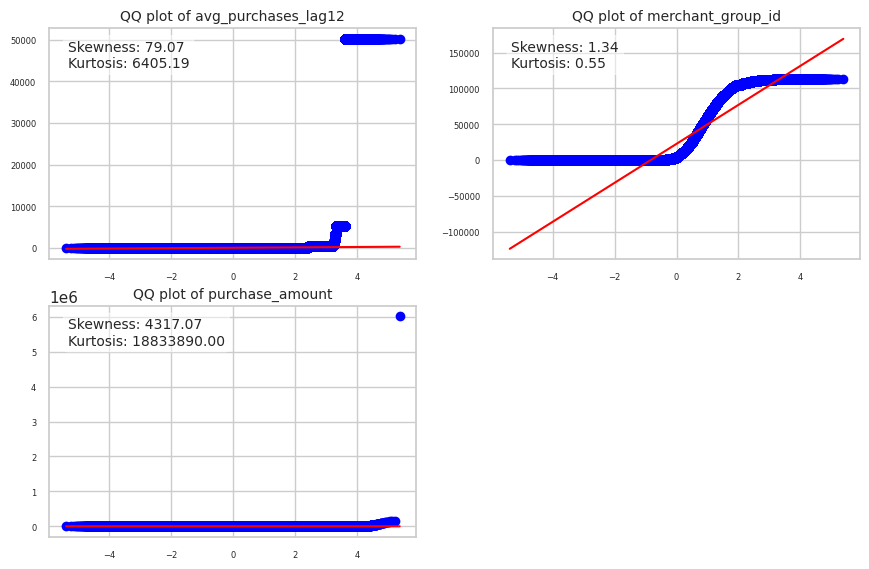

In [95]:
cols =  ['avg_purchases_lag12', 'merchant_group_id','purchase_amount']
QQplot(merged_df, cols , figsize = (9,6), n=2)

### Log Transformation
The log(n+1) transformation is commonly used to transform data that has a skewed distribution to a more normal distribution.
- NaN or null values appeared applying the log(n+1) transformation to your data, it is likely that some of the values in your dataset are zero or negative. The natural logarithm is undefined for zero and negative values, so when you apply the transformation to such values, you will get NaN or null values.
    > So, I will use this formula $[log(x- df.min().min() + 1)]$

In [98]:
cols =  ['avg_purchases_lag12', 'merchant_group_id','purchase_amount']

for col in cols:
    merged_df['log_'+col] = np.log(merged_df[col]- merged_df[col].min()+ 1)

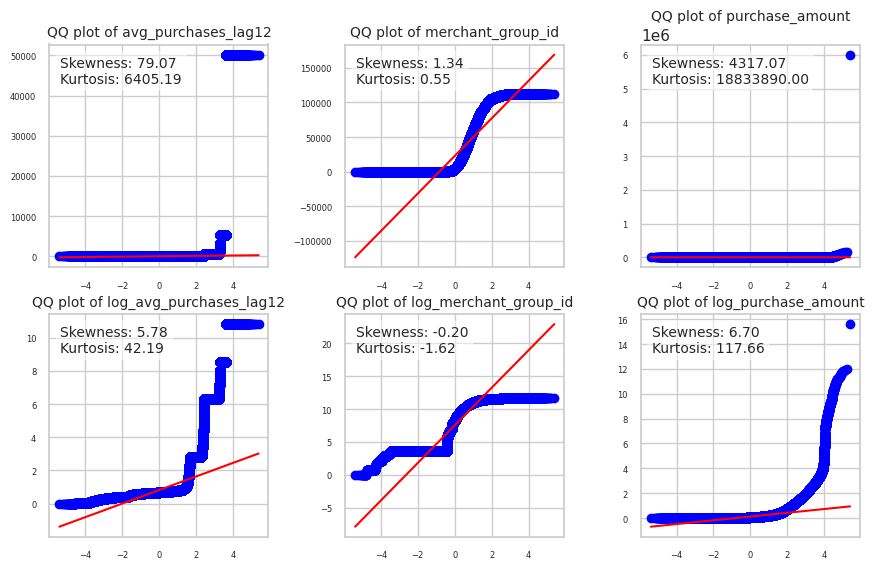

In [101]:
cols =  ['avg_purchases_lag12', 'merchant_group_id','purchase_amount', 'log_avg_purchases_lag12', 'log_merchant_group_id','log_purchase_amount']
QQplot(merged_df, cols , figsize = (9,6), n=3)

In [104]:
log_purchase_amount_outlier = merged_df[merged_df.log_purchase_amount > 14]['card_id']
print(f'Number of transactions when purchase_amount is outlier = {log_purchase_amount_outlier.count()} with {log_purchase_amount_outlier.nunique()} unique card')

Number of transactions when purchase_amount is outlier = 1 with 1 unique card


<a ><font size="3"><b>OBSERVATION:</b></font></a>
I will delete this outlier point.

In [105]:
merged_df.drop(log_purchase_amount_outlier.index, axis = 0, inplace = True)

---
## **Exploratory Data Analysis (EDA)**

---

### Explore Some Features

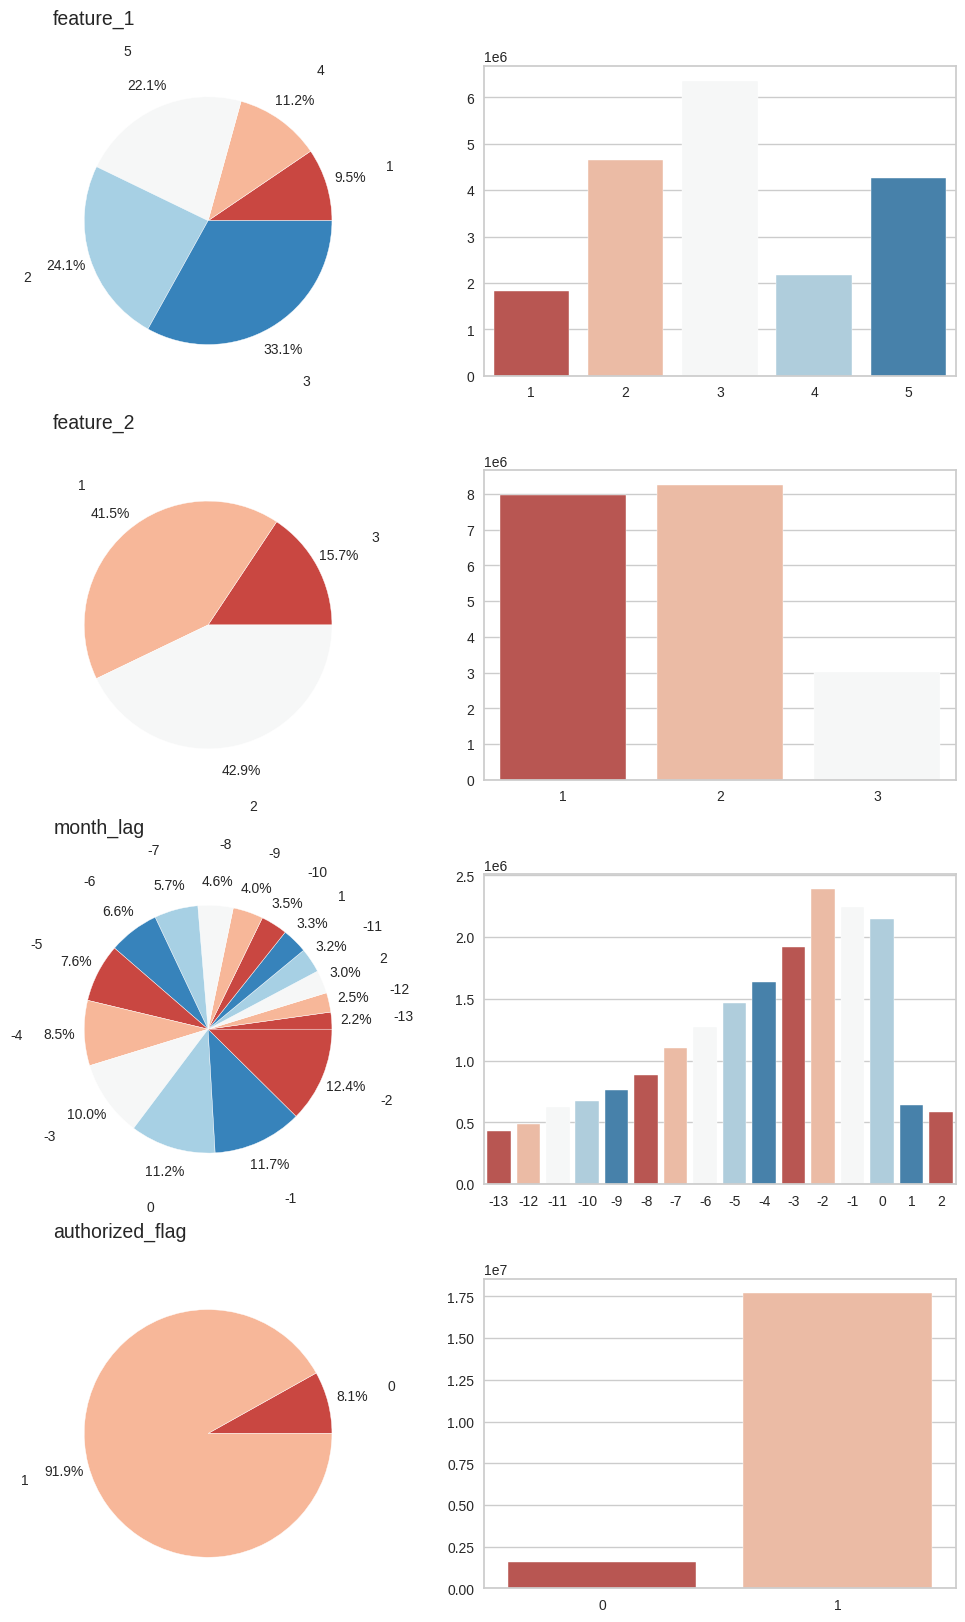

In [424]:
InteractiveShell.ast_node_interactivity = 'last_expr'
cols = ['feature_1', 'feature_2','month_lag', 'authorized_flag']
n_cat_samples(merged_df, cols, figsize=(10,20))

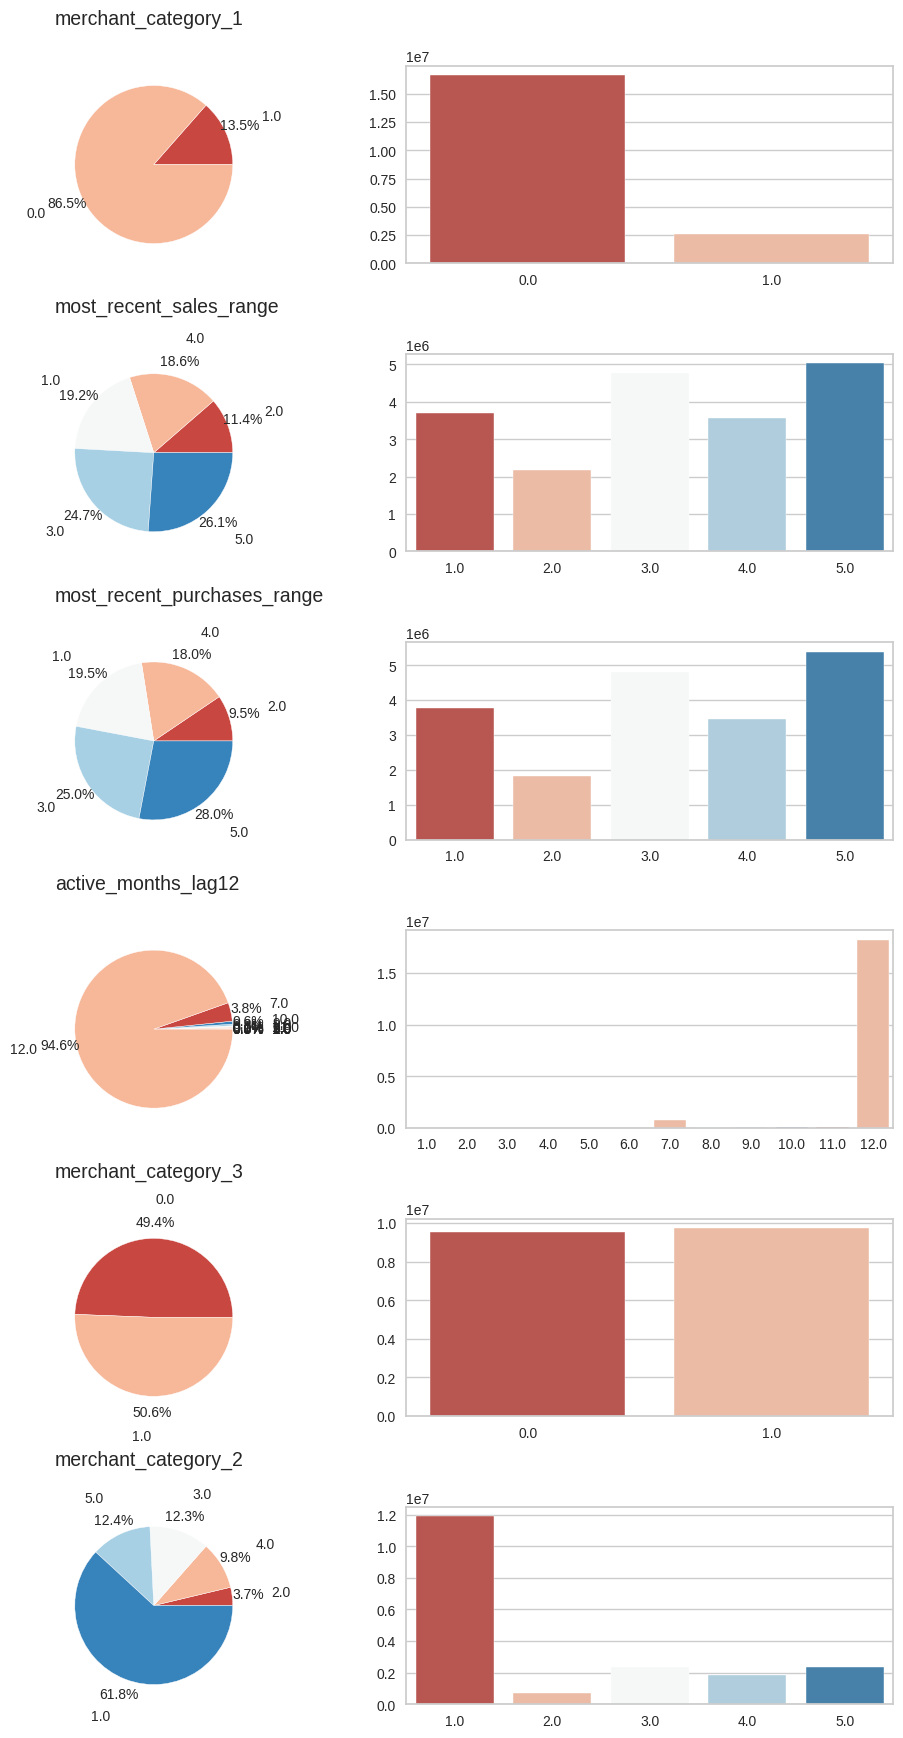

In [422]:
cols = ['merchant_category_1', 'most_recent_sales_range','most_recent_purchases_range', 
        'active_months_lag12', 'merchant_category_3', 'merchant_category_2',]

n_cat_samples(merged_df[cols], cols, num_bins=10)

<a ><font size="3"><b>OBSERVATION:</b></font></a>
- In `active_month_lag` the majority of the values (over 300,000) are 12, indicating that most of the cards in the dataset were active for all 12 months prior to the reference month.
- `most_resent_sales_range` is the range of revenue (monetary units) in last active month --> A > B > C > D > E.
- `most_resent_purchases_range`is the range of quantity of transactions in last active month --> A > B > C > D > E.

    - The customers who make more transactions also generate more revenue.

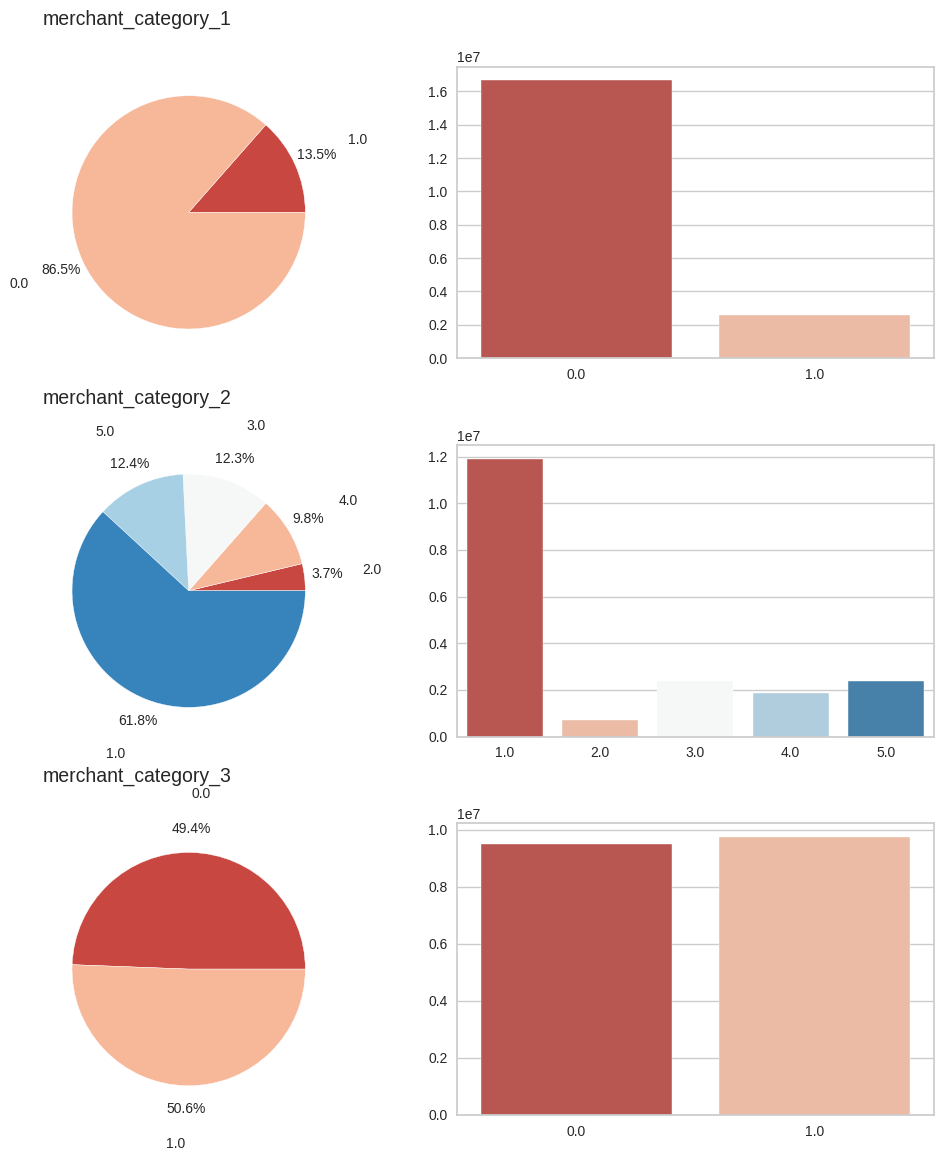

In [423]:
cols = ['merchant_category_1', 'merchant_category_2', 'merchant_category_3']
n_cat_samples(merged_df, cols, figsize=(10,15))

### Closer Look at `first_active_month`

Text(0, 0.5, 'Count')

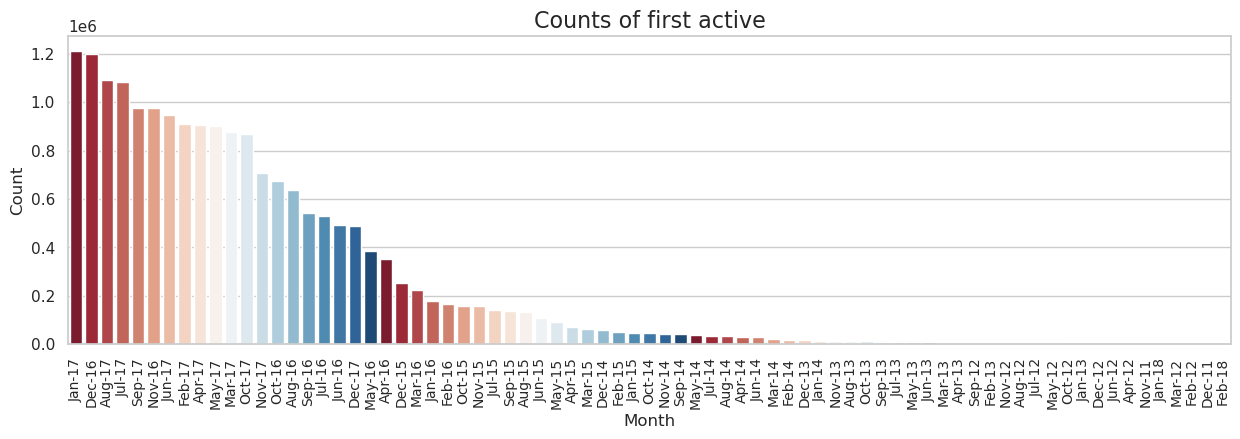

In [ ]:
InteractiveShell.ast_node_interactivity = 'last_expr'
plt.figure(figsize=(15,4))
active_month = merged_df['first_active_month'].value_counts()
sns.barplot(x=active_month.index, y=active_month.values,palette=palette_color)
plt.xticks(rotation=90, fontsize=10)
plt.title('Counts of first active',fontsize=16)
plt.xlabel('Month')
plt.ylabel('Count')

<a ><font size="3"><b>OBSERVATION:</b></font></a> There are more active month in the 17th of each month.

### Closer Look at `score`
Check Score Loyality Distribution

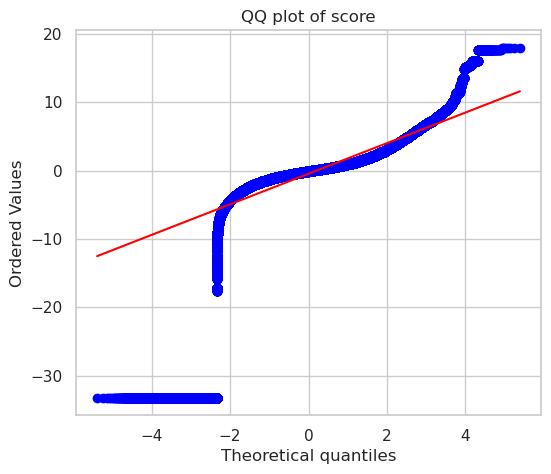

In [ ]:
InteractiveShell.ast_node_interactivity = 'last_expr'
plt.figure(figsize=(6,5))
stats.probplot(merged_df['score'], dist="norm", plot=plt)
plt.title(f"QQ plot of score", fontsize = 12);

In [109]:
OutliersInfo(merged_df, ['score'])


score
-----------------------------------
Number of outlier samples produced by IQR is 3190923
0% percentile value is -33.219
1% percentile value is -10.000
98% percentile value is 3.227
99% percentile value is 4.156
100% percentile value is 17.969

	- Number of values less than -10.0 is 192228
	- Number of values greater than 4.15625 is 192087


#### Separate the outliers from score

In [110]:
mask = (merged_df.score <= -10) | (merged_df.score > 5)

print(f"{merged_df[mask]['score'].count()/len(merged_df) * 100} % of scores are rare data (outliers)")
score_outlier  = merged_df[mask]
score_non_outlier = merged_df[~mask]

merged_df['is_rare_data'] = 0
merged_df.loc[score_outlier.index, 'is_rare_data'] = 1

1.536716245566595 % of scores are rare data (outliers)


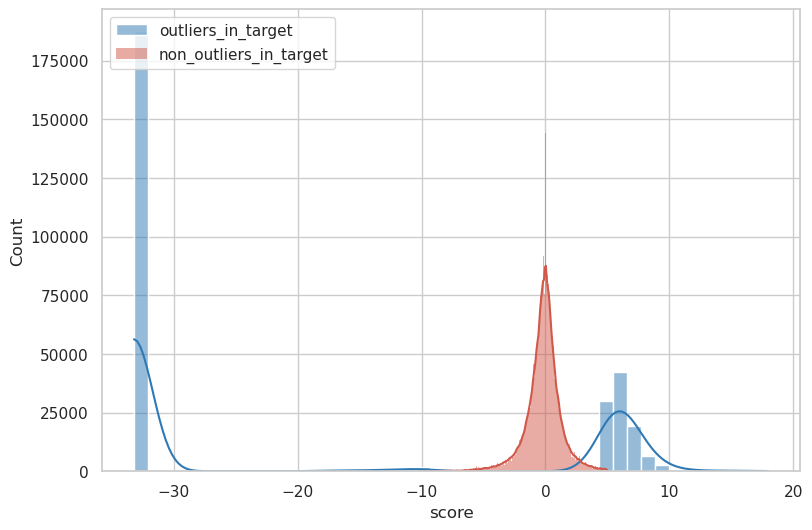

In [ ]:
InteractiveShell.ast_node_interactivity = 'last_expr'
plt.figure(figsize=(9,6));
sns.histplot(score_outlier['score'].astype('float64'),label=('outliers_in_target'), kde=True,color = palette_color[17])
sns.histplot(score_non_outlier['score'].astype('float64'),label=('non_outliers_in_target'), kde=True,color = palette_color[3])
plt.legend(loc='upper left')
plt.show()

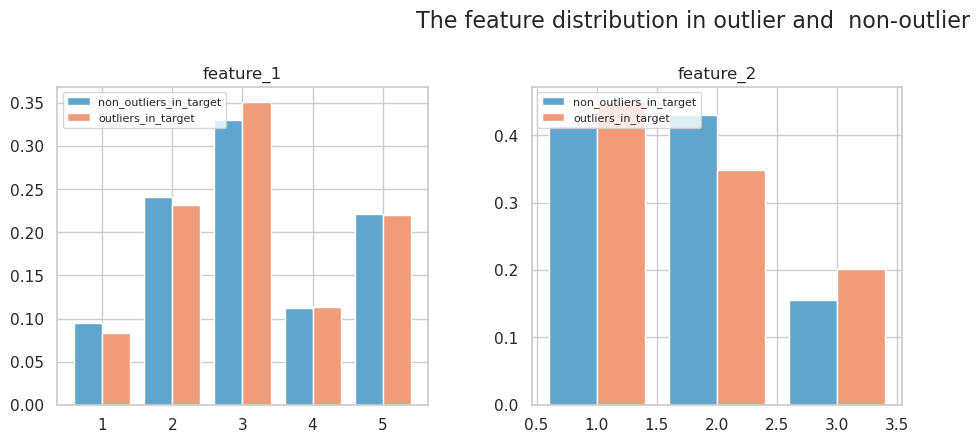

In [114]:
InteractiveShell.ast_node_interactivity = 'last_expr'
plt.figure(figsize=[15,5])
cols= ['feature_1', 'feature_2']
for i,col in enumerate(cols):
    plt.subplot(1,3,i+1)

    non_outliers=score_non_outlier[col].value_counts() /score_non_outlier.shape[0]
    outliers=score_outlier[col].value_counts() /score_outlier.shape[0]

    plt.bar(non_outliers.index, non_outliers, label=('non_outliers_in_target'),align='edge',width=-0.4,color= palette_color[15])
    plt.bar(outliers.index, outliers, label=('outliers_in_target'),align='edge',width=0.4,color = palette_color[5])
    plt.title(col,fontsize=12)
    plt.legend(loc='upper left',fontsize=8)
    plt.tight_layout(pad=4, h_pad=0.9)

plt.suptitle('The feature distribution in outlier and  non-outlier', fontsize=16)
plt.show()

Number of samples score_non_outlier = 18950730
Number of samples score_outlier = 295764


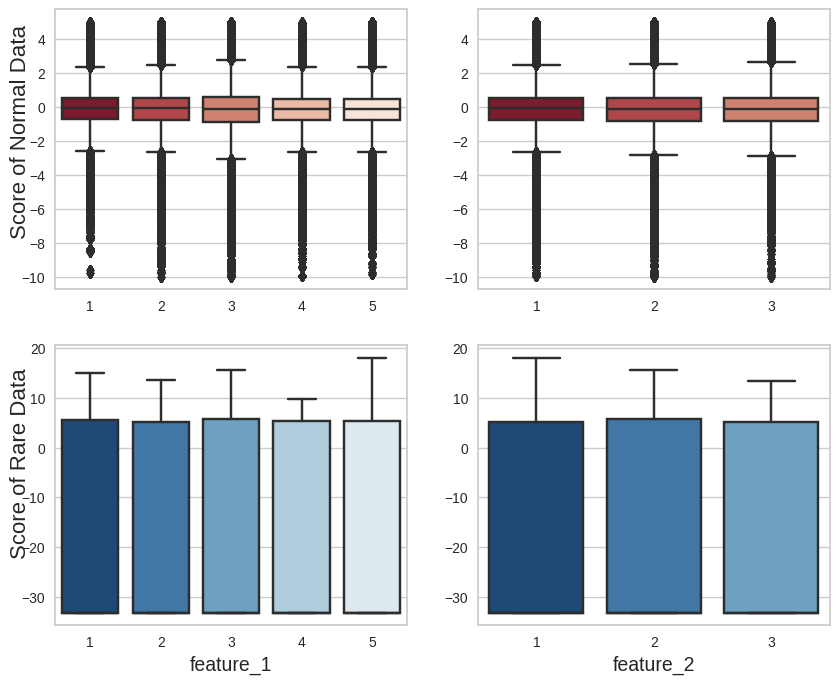

In [430]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
cols = ['feature_1', 'feature_2']

print(f"Number of samples score_non_outlier = {score_non_outlier.shape[0]}")
print(f"Number of samples score_outlier = {score_outlier.shape[0]}")

for i,col in enumerate(cols):
    sns.boxplot(y='score', x=col, data= score_non_outlier , ax=axs[0][i], palette = palette_color[::2])
    sns.boxplot(y='score', x=col, data= score_outlier, ax=axs[1][i], palette = palette_color[::-2])

    axs[1][i].set_xlabel(col, fontsize = 14)

    axs[0][i].set_ylabel('')
    axs[1][i].set_ylabel('')
    axs[0][i].set_xlabel('')

fig.text(0.08, 0.2, 'Score of Rare Data', rotation='vertical', fontsize=16);
fig.text(0.08, 0.6, 'Score of Normal Data', rotation='vertical', fontsize=16);
plt.show()

<a ><font size="3"><b>OBSERVATION:</b></font></a>

The differences between the outliers and non-outliers in feature_1, feature_2, and feature_3 are negligible, implying that their inclusion in the dataset could potentially cause issues during training. It would be better to **exclude these values from the dataset**.



In [118]:
print(f'The number of cards that contain an odd score is : {score_outlier.card_id.nunique()}')

The number of cards that contain an odd score is : 4001


In [431]:
gc.collect()

1014476

---
<h1 style="text-align:center;"><font color = "#2471A3">FEATURE ENGINEERING</font></h1>

---

---
## **DataTime Feature Engineering**

---

#### **Purchase Date**
Following [Rjt5412](https://github.com/Rjt5412/Elo-Merchant-Category-Recommendation) i will add three new columns `purchase_year`, `purchase_month`, and `purchase_dow`, which contain the year, month, and day of the week for each transaction, respectively. The dayofweek attribute returns the day of the week as an integer, where Monday is 0 and Sunday is 6. Note that we have also converted the year and month columns to categorical data type, as they are categorical variables.

**Steps:**
1. Converting the `purchase_date` column to a datetime object.
2. Creating new columns for weekday, weekend indicator, month, day of year, week of year, hour, and holiday indicator.
3. Calculating the number of months since each transaction using `month_diff`.

In [124]:
import datetime
def Purchase_date_feature_extraction(df):
    df['purchase_date']  = pd.to_datetime(df['purchase_date'], format='%Y-%m-%d %H:%M:%S')

    # Create columns for the purchase year, month, day of week, and hour.
    df['purchase_year']  = df.purchase_date.dt.year
    df['purchase_month'] = df.purchase_date.dt.month
    df['purchase_dow']   = df.purchase_date.dt.dayofweek
    df['purchase_hour']  = df.purchase_date.dt.hour

    # create a categorical column indicating the part of the day the purchase was made - night, morning, afternoon or evening.
    df['purchase_part_day'] = pd.cut(df['purchase_hour'] , [-1, 5, 12, 17, 23],
                                          labels=['night', 'morning', 'afternoon', 'evening'])

    # Create a column indicating bmif the purchase was on a weekend or not.
    df['is_weekend']     = df.purchase_dow.apply(lambda day: 1 if day == 5 or day == 6 else 0)

    # Calculate difference in months correctly
    current_date = datetime.date.today()
    df['month_diff'] = ((current_date - df['purchase_date'].dt.date) / np.timedelta64(1, 'M'))  + df['month_lag']
    return df

In [125]:
merged_df = Purchase_date_feature_extraction(merged_df)
merged_df.head(5)

,card_id,first_active_month,feature_1,feature_2,score,authorized_flag,installments,transaction_category_3,merchant_id,month_lag,purchase_amount,purchase_date,merchant_group_id,merchant_category_id,merchant_subsector_id,merchant_category_1,most_recent_sales_range,most_recent_purchases_range,avg_purchases_lag12,active_months_lag12,merchant_category_3,merchant_city_id,merchant_state_id,merchant_category_2,merchant_numerical_1_bins,log_avg_purchases_lag12,log_merchant_group_id,log_purchase_amount,is_rare_data,purchase_year,purchase_month,purchase_dow,purchase_hour,purchase_part_day,is_weekend,month_diff
0,C_ID_92a2005557,Jun-17,5,2,-0.8203,1,0.0000,3.0000,M_ID_98b342c0e3,1,-0.4915,2018-03-30 10:30:32,35.0000,80.0000,37.0000,0.0000,5.0000,5.0000,1.2613,12.0000,0.0000,159.0000,9.0000,1.0000,20.0000,0.7715,3.5553,0.2276,0,2018,3,4,10,morning,0,63.6543
1,C_ID_92a2005557,Jun-17,5,2,-0.8203,1,0.0000,3.0000,M_ID_28a21ea733,2,-0.6665,2018-04-06 10:55:08,"45,545.0000",80.0000,37.0000,0.0000,2.0000,1.0000,0.8214,5.0000,1.0000,69.0000,9.0000,1.0000,0.0000,0.5441,10.7265,0.0775,0,2018,4,4,10,morning,0,64.4243
2,C_ID_92a2005557,Jun-17,5,2,-0.8203,1,0.0000,3.0000,M_ID_20dce166b9,1,-0.6353,2018-03-29 15:38:10,"16,785.0000",278.0000,37.0000,0.0000,3.0000,3.0000,1.1549,12.0000,0.0000,231.0000,9.0000,1.0000,0.0000,0.7210,9.7282,0.1060,0,2018,3,3,15,afternoon,0,63.6871
3,C_ID_92a2005557,Jun-17,5,2,-0.8203,1,0.0000,3.0000,M_ID_f7796994d1,2,-0.5811,2018-04-09 13:56:50,"78,720.0000",842.0000,37.0000,0.0000,3.0000,3.0000,0.8790,12.0000,1.0000,69.0000,9.0000,1.0000,5.0000,0.5770,11.2737,0.1536,0,2018,4,0,13,afternoon,0,64.3257
4,C_ID_92a2005557,Jun-17,5,2,-0.8203,1,0.0000,3.0000,M_ID_0703c10cc0,1,-0.2961,2018-03-12 16:49:03,"81,548.0000",783.0000,19.0000,0.0000,1.0000,1.0000,0.6763,10.0000,0.0000,188.0000,9.0000,1.0000,0.0000,0.4562,11.3089,0.3722,0,2018,3,0,16,afternoon,0,64.2457


In [126]:
gc.collect()

0

#### **First Active Month**

**Steps:**

1. Convert the 'first_active_month' column to a datetime format using the pd.to_datetime() function.
2. Extract the year from the 'first_active_month' column and create a new column called 'year_of_joining'.
3. Extract the quarter from the 'first_active_month' column and create a new column called 'quarter_first_active_month'.
4. Calculate the difference in days between the 'first_active_month' column and the current date, and create a new column called 'first_active_month_diff_from_today_in_days'.

In [127]:
def Active_month_feature_extraction(df):

    df['first_active_month'] = pd.to_datetime(df['first_active_month'], format='%b-%y')
    df['year_of_joining'] = df['first_active_month'].dt.year
    df['quarter_first_active_month'] = df['first_active_month'].dt.quarter
    df['first_active_month_diff_from_today_in_days'] = (datetime.datetime.today() - df['first_active_month']).dt.days

    del df['first_active_month']

    return df

In [128]:
merged_df = Active_month_feature_extraction(merged_df)
merged_df.head(5)

,card_id,feature_1,feature_2,score,authorized_flag,installments,transaction_category_3,merchant_id,month_lag,purchase_amount,purchase_date,merchant_group_id,merchant_category_id,merchant_subsector_id,merchant_category_1,most_recent_sales_range,most_recent_purchases_range,avg_purchases_lag12,active_months_lag12,merchant_category_3,merchant_city_id,merchant_state_id,merchant_category_2,merchant_numerical_1_bins,log_avg_purchases_lag12,log_merchant_group_id,log_purchase_amount,is_rare_data,purchase_year,purchase_month,purchase_dow,purchase_hour,purchase_part_day,is_weekend,month_diff,year_of_joining,quarter_first_active_month,first_active_month_diff_from_today_in_days
0,C_ID_92a2005557,5,2,-0.8203,1,0.0000,3.0000,M_ID_98b342c0e3,1,-0.4915,2018-03-30 10:30:32,35.0000,80.0000,37.0000,0.0000,5.0000,5.0000,1.2613,12.0000,0.0000,159.0000,9.0000,1.0000,20.0000,0.7715,3.5553,0.2276,0,2018,3,4,10,morning,0,63.6543,2017,2,2209
1,C_ID_92a2005557,5,2,-0.8203,1,0.0000,3.0000,M_ID_28a21ea733,2,-0.6665,2018-04-06 10:55:08,"45,545.0000",80.0000,37.0000,0.0000,2.0000,1.0000,0.8214,5.0000,1.0000,69.0000,9.0000,1.0000,0.0000,0.5441,10.7265,0.0775,0,2018,4,4,10,morning,0,64.4243,2017,2,2209
2,C_ID_92a2005557,5,2,-0.8203,1,0.0000,3.0000,M_ID_20dce166b9,1,-0.6353,2018-03-29 15:38:10,"16,785.0000",278.0000,37.0000,0.0000,3.0000,3.0000,1.1549,12.0000,0.0000,231.0000,9.0000,1.0000,0.0000,0.7210,9.7282,0.1060,0,2018,3,3,15,afternoon,0,63.6871,2017,2,2209
3,C_ID_92a2005557,5,2,-0.8203,1,0.0000,3.0000,M_ID_f7796994d1,2,-0.5811,2018-04-09 13:56:50,"78,720.0000",842.0000,37.0000,0.0000,3.0000,3.0000,0.8790,12.0000,1.0000,69.0000,9.0000,1.0000,5.0000,0.5770,11.2737,0.1536,0,2018,4,0,13,afternoon,0,64.3257,2017,2,2209
4,C_ID_92a2005557,5,2,-0.8203,1,0.0000,3.0000,M_ID_0703c10cc0,1,-0.2961,2018-03-12 16:49:03,"81,548.0000",783.0000,19.0000,0.0000,1.0000,1.0000,0.6763,10.0000,0.0000,188.0000,9.0000,1.0000,0.0000,0.4562,11.3089,0.3722,0,2018,3,0,16,afternoon,0,64.2457,2017,2,2209


---
## **Feature Aggregation By CardID**

---

### Aggregation by `card_id` on `purchase_date`

In [168]:
import statistics
def Agg_purchase_date(df):
    agg_dict = {
        'month_diff': ['var'],
        'purchase_date' : [np.ptp, 'max', 'min'],
        'purchase_month': statistics.mode,
        'is_weekend': statistics.mode,
        'merchant_id':'nunique',
        'card_id' : 'size',
    }

    df['purchase_date'] = pd.to_datetime(df['purchase_date'])
    agg_df = df.groupby('card_id').agg(agg_dict).reset_index()

    # Rename columns
    agg_df.columns = ['trans_'+'_'.join(col).strip() for col in agg_df.columns.values]
    agg_df = agg_df.rename(columns={'trans_card_id_':'card_id'})

    # Calculate diffrance date
    agg_df['trans_purchase_date_ptp'] = agg_df['trans_purchase_date_ptp'].dt.days
    agg_df['trans_purchase_date_max_diff_now'] = (datetime.datetime.today() - agg_df['trans_purchase_date_max']).dt.days
    agg_df['trans_purchase_date_min_diff_now'] = (datetime.datetime.today() - agg_df['trans_purchase_date_min']).dt.days

    del agg_df['trans_purchase_date_ptp'], agg_df['trans_purchase_date_max'], agg_df['trans_purchase_date_min']

    return agg_df

In [169]:
agg_purchase_date = Agg_purchase_date(merged_df)
agg_purchase_date.head(5)

,card_id,trans_month_diff_var,trans_purchase_month_mode,trans_is_weekend_mode,trans_merchant_id_nunique,trans_card_id_size,trans_purchase_date_max_diff_now,trans_purchase_date_min_diff_now
0,C_ID_00007093c1,0.0878,6,0,31,151,1896,2315
1,C_ID_0001506ef0,0.0591,12,0,29,68,1914,2346
2,C_ID_000183fdda,0.0911,2,0,84,155,1875,2141
3,C_ID_00027503e2,0.0635,7,0,12,42,1976,2213
4,C_ID_0002c7c2c1,0.0645,11,0,44,73,1912,2255


### Aggregation by `card_id` on `purchase_amount`

Computes several aggregate statistics ontransactions the `purchase_amount` column for each group. The computed statistics are the minimum, maximum, mean, median, standard deviation, sum, and count.This aggregated data gives an overview of each customer's spending behavior:

- High maximum or average amounts indicate big ticket purchases
- A wide spread (high standard deviation) suggests irregular spending
- A high total spend sum purchase_amount captures overall expenditures
- The count of transactions reveals purchase frequency

In [171]:
def Agg_purchase_amount(df):
    agg_df = df.groupby('card_id')['log_purchase_amount'].agg(['var','median', 'sum']).reset_index()
    agg_df.columns = ['trans_purchase_amount_'+str(col) for col in agg_df.columns.values]
    agg_df = agg_df.rename(columns={'trans_purchase_amount_card_id':'card_id'})
    return agg_df

In [172]:
agg_purchase_amount = Agg_purchase_amount(merged_df)
agg_purchase_amount.head(3)

,card_id,trans_purchase_amount_var,trans_purchase_amount_median,trans_purchase_amount_sum
0,C_ID_00007093c1,0.0338,0.1403,28.1884
1,C_ID_0001506ef0,0.0765,0.0402,10.1632
2,C_ID_000183fdda,0.0711,0.0809,28.7525


In [173]:
del agg_purchase_amount['card_id']

### Aggregation by `card_id` some features

In [175]:
def Agg_other_features(df):
    agg_dict = {
        'transaction_category_3' : statistics.mode,
        'merchant_category_1' : statistics.mode,
        'merchant_category_2' : statistics.mode,
        'merchant_category_3' : statistics.mode,
        'merchant_city_id' : ['nunique', statistics.mode],
        'merchant_state_id' : ['nunique', statistics.mode],
        'merchant_subsector_id' : ['nunique', statistics.mode],
        'merchant_category_id' : ['nunique', statistics.mode],
        'most_recent_purchases_range': statistics.mode,
        'merchant_numerical_1_bins': statistics.mode,
        'installments' : statistics.mode,
        'month_lag': 'var',
        'active_months_lag12':'var',
        'log_avg_purchases_lag12': 'mean',
        'score': 'min',
    }

    agg_df = df.groupby('card_id').agg(agg_dict).reset_index()
    agg_df.columns = [str(level1)+'_'+str(level2) for level1, level2 in agg_df.columns.values]
    agg_df = agg_df.rename(columns={'score_min': 'score'})

    return agg_df

In [176]:
agg_other_features = Agg_other_features(merged_df)
agg_other_features.head(3)

,card_id_,transaction_category_3_mode,merchant_category_1_mode,merchant_category_2_mode,merchant_category_3_mode,merchant_city_id_nunique,merchant_city_id_mode,merchant_state_id_nunique,merchant_state_id_mode,merchant_subsector_id_nunique,merchant_subsector_id_mode,merchant_category_id_nunique,merchant_category_id_mode,most_recent_purchases_range_mode,merchant_numerical_1_bins_mode,installments_mode,month_lag_var,active_months_lag12_var,log_avg_purchases_lag12_mean,score
0,C_ID_00007093c1,2.0000,0.0000,3.0000,0.0000,3,323.0000,2,2.0000,13,19.0000,19,307.0000,1.0000,0.0000,1.0000,12.5762,0.3939,0.6935,0.1340
1,C_ID_0001506ef0,3.0000,0.0000,3.0000,1.0000,4,137.0000,3,19.0000,13,33.0000,18,705.0000,5.0000,0.0000,0.0000,18.4063,0.7243,0.7645,0.8843
2,C_ID_000183fdda,2.0000,0.0000,3.0000,1.0000,7,161.0000,4,3.0000,21,16.0000,37,367.0000,3.0000,0.0000,1.0000,4.2700,0.8373,0.8225,-0.2644


### Concatenate Aggregated Datasets

In [178]:
all_agg_data = pd.concat([agg_purchase_date, agg_other_features, agg_purchase_amount], axis = 1)
all_agg_data.shape

(201917, 31)

In [285]:
DescriptiveStats(all_agg_data)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max,skewness,kurtosis
card_id,201917,201917,C_ID_00007093c1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
trans_month_diff_var,"201,917.0000",201809,0.0006,13,0.0764,0.0237,0.0001,0.0633,0.0773,0.0892,0.3223,0.1678,1.9679
trans_purchase_month_mode,"201,917.0000",12,1,37868,6.0468,4.1723,1.0000,2.0000,6.0000,10.0000,12.0000,0.1573,-1.5793
trans_is_weekend_mode,"201,917.0000",2,0,190855,0.0548,0.2276,0.0000,0.0000,0.0000,0.0000,1.0000,3.9130,13.3115
trans_merchant_id_nunique,"201,917.0000",344,14,4384,39.6370,34.2244,1.0000,17.0000,30.0000,51.0000,494.0000,2.2337,7.9072
trans_card_id_size,"201,917.0000",1039,22,2357,95.3188,106.9107,2.0000,31.0000,60.0000,118.0000,"2,915.0000",3.3206,20.2633
trans_purchase_date_max_diff_now,"201,917.0000",435,1875,12358,"1,932.0155",76.0838,"1,875.0000","1,882.0000","1,902.0000","1,946.0000","2,325.0000",2.0438,3.9245
trans_purchase_date_min_diff_now,"201,917.0000",367,2358,8896,"2,226.2725",119.1145,"1,989.0000","2,117.0000","2,251.0000","2,347.0000","2,360.0000",-0.3748,-1.3404
transaction_category_3_mode,"201,917.0000",3,3.0000,96092,2.4148,0.6040,1.0000,2.0000,2.0000,3.0000,3.0000,-0.5019,-0.6400
merchant_category_1_mode,"201,917.0000",2,0.0000,186539,0.0762,0.2653,0.0000,0.0000,0.0000,0.0000,1.0000,3.1958,8.2129


In [179]:
del all_agg_data['card_id_']

In [223]:
float16_cols = all_agg_data.select_dtypes('float16').columns

for col in float16_cols:
    all_agg_data[col] = all_agg_data[col].astype(float)

### L2 Normalization

In [301]:
df_Norm1 = all_agg_data.copy()
columns_to_normalize = df_Norm1.drop(['score', 'card_id'], axis = 1).columns 
scaler = Normalizer(norm='l1')
df_Norm1[columns_to_normalize] = scaler.fit_transform(df_Norm1[columns_to_normalize])

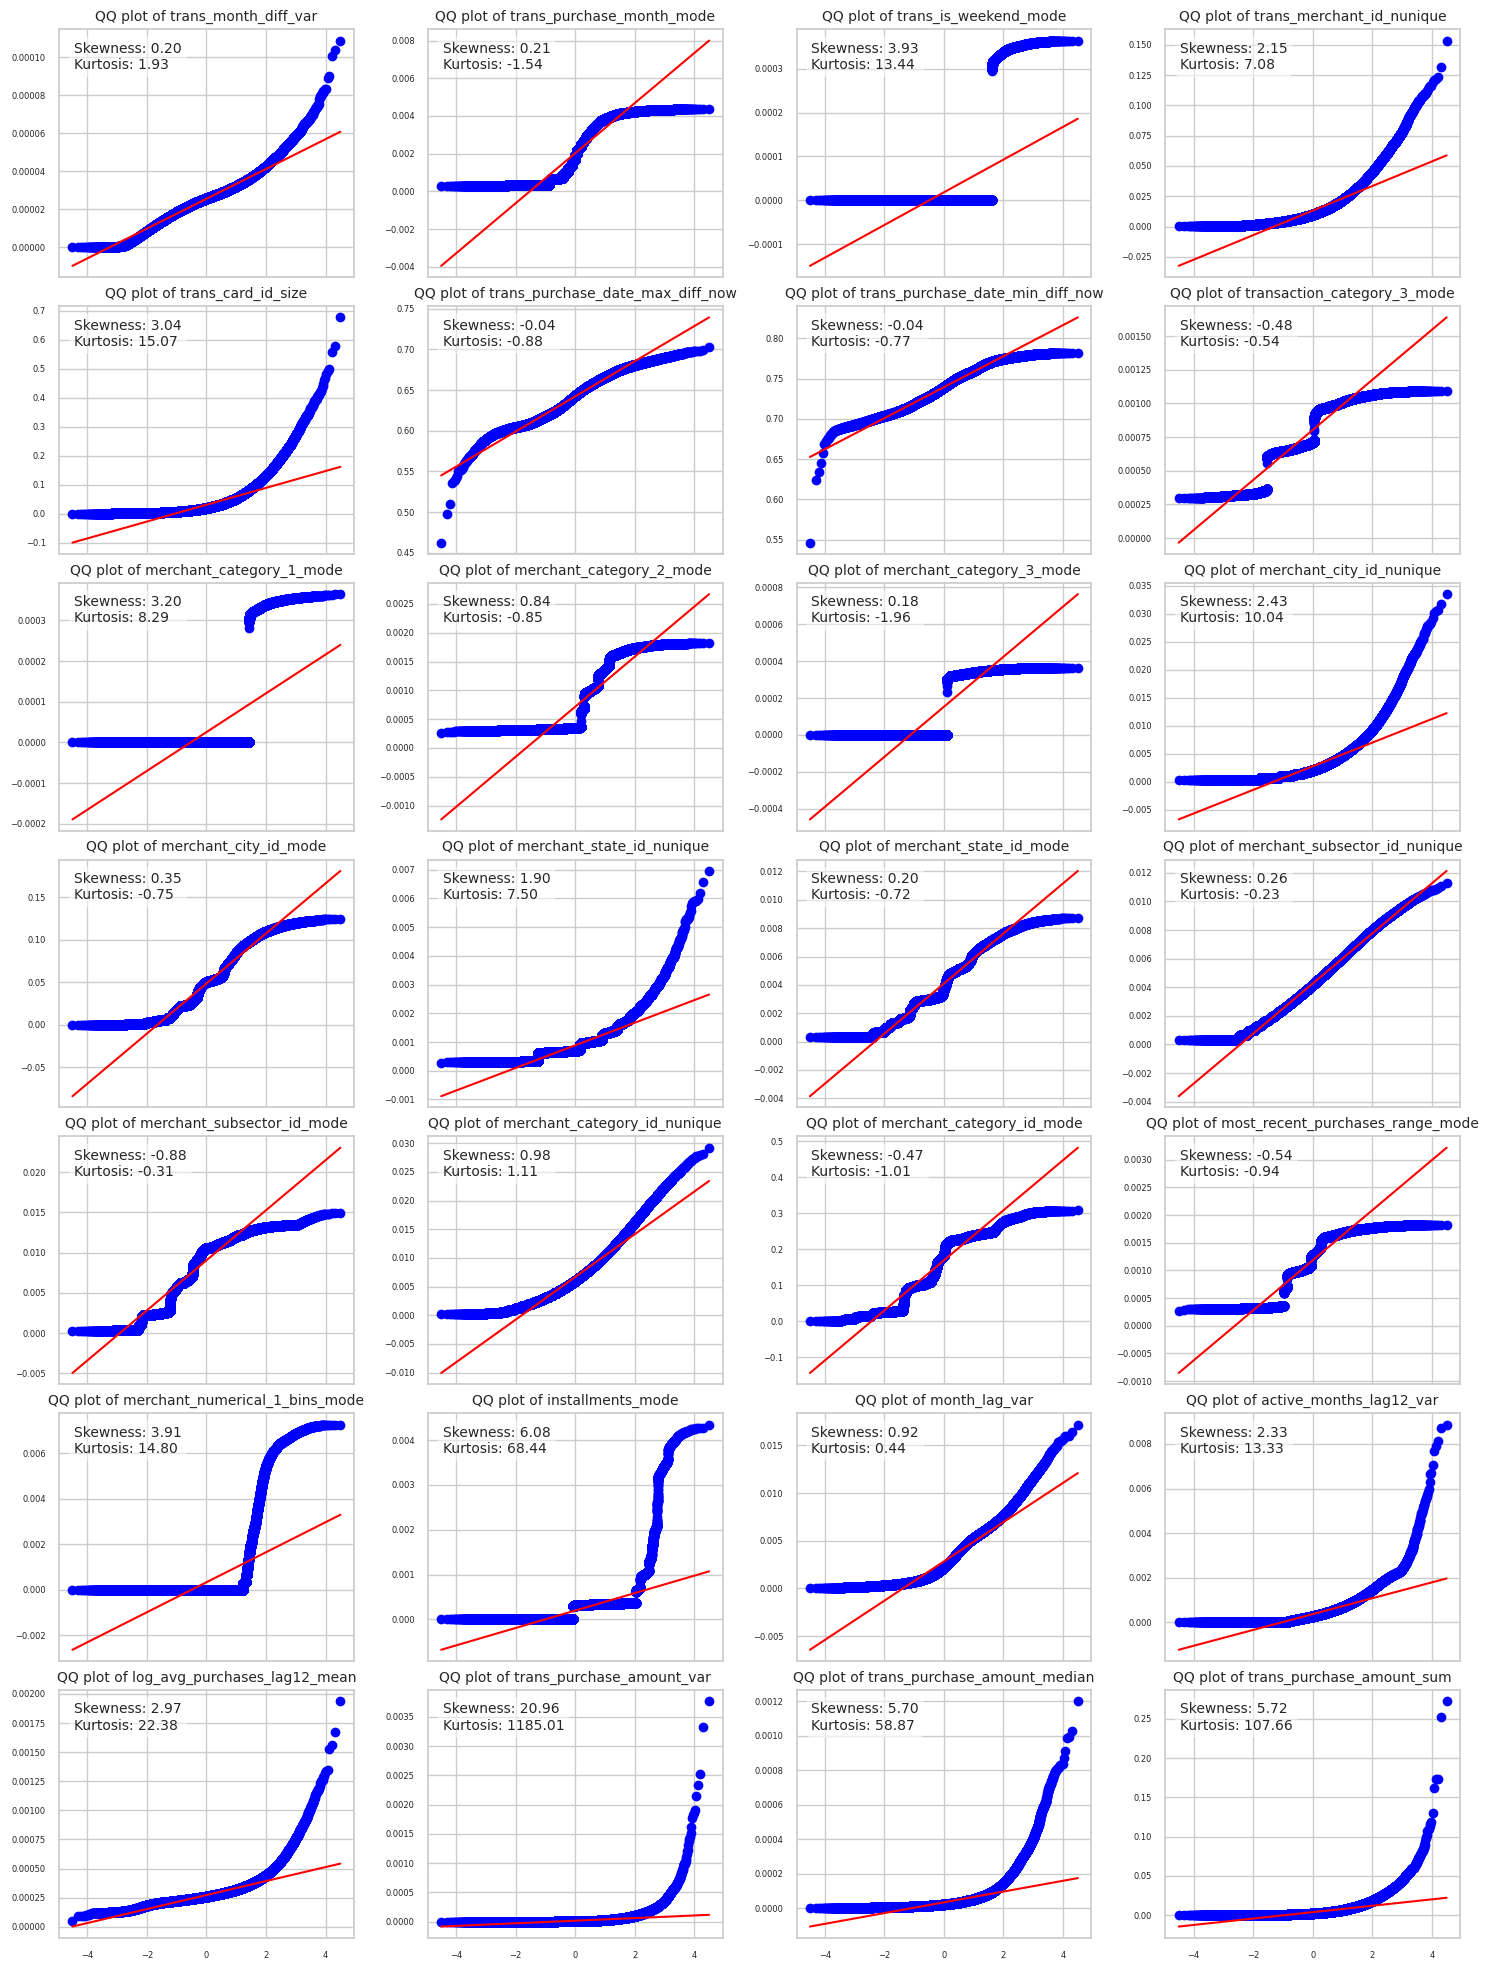

In [186]:
QQplot(df_Norm1, df_Norm1.columns, figsize=(15,20), n=4, sharex = True)

<a ><font size="3"><b>OBSERVATION:</b></font></a>
After Normalization some features looks better

In [195]:
del agg_purchase_date, agg_other_features, agg_purchase_amount

### Save processed Dataset

**NOTE:** Saving the pre-processed features to disk allows you to load them directly without having to reprocess the original data each time I run the script.

In [302]:
file_path = os.path.join(os.getcwd(), 'Normalized_Aggregated_Data.csv')
df_Norm1.to_csv(file_path, index = False)

---
## **Create RFM Dataset**

---
The RFM score can be used to segment customers into different groups. For example, customers with high RFM scores are considered to be "high-value" customers, while customers with low RFM scores are considered to be "low-value" customers. These customer segments can then be used to target different marketing campaigns.
- Combine the recency, frequency, and monetary value scores to create an RFM score for each customer.
- We look at the minimum for Recency (R) and maximum values for Frequency (F), and Monetary values (M).
- The RFM score is a single number that represents a customer's overall purchase behavior.
- The `recency` score is calculated by subtracting the purchase date from the current date and then dividing by the number of days in a year.
- The `frequency` score is calculated by counting the number of purchases a customer has made in the past year.
- The `monetary` value score is calculated by summing the total amount of money a CardHolder has spent.

##### **RESOURCE:** https://www.datacamp.com/tutorial/introduction-customer-segmentation-python

In [200]:
%%time
RFM_df = pd.DataFrame()
RFM_df['recency'] =  merged_df.groupby('card_id').agg({'month_diff':'max'})
RFM_df['frequency'] = merged_df.groupby('card_id').agg({'card_id':'size'})
RFM_df['monetary_value'] = merged_df.groupby('card_id').agg({'log_purchase_amount':'sum'})
RFM_df

CPU times: user 3.54 s, sys: 572 ms, total: 4.12 s
Wall time: 4.11 s


,recency,frequency,monetary_value
card_id,,,
C_ID_00007093c1,64.5764,151,28.1884
C_ID_0001506ef0,64.5723,68,10.1632
C_ID_000183fdda,64.5742,155,28.7525
C_ID_00027503e2,65.4469,42,0.2529
C_ID_0002c7c2c1,65.5251,73,5.9793
...,...,...,...
C_ID_fffeced303,64.5621,190,11.1069
C_ID_fffeed3a89,64.6071,219,32.9417
C_ID_ffff579d3a,64.5496,115,4.7656



### Computing Quantile of RFM values

By spliting the data for R, F, and M into groups with the use of quintiles; Each bucket will receive a score. Deciding the number of groups based on the number of customers as follows:
- From 1 to 5 if you have more than 200k customers;
- From 1 to 4 if you have 30-200k customers;
- From 1 to 3 if you have less than 30k customers.
##### RESOURCE: https://www.omniconvert.com/blog/rfm-analysis/

I decided to use 5 diffrent cuts for my data as we have (325,540) unique CardHolder ~ 300K customer. The describtion of the customer segments is in the below table following this [**RESOURCE**](https://www.omniconvert.com/blog/rfm-analysis/).

Points | Recency (days since last purchase) | Frequency / Monetary values (number of orders and orders value)
------- | ------------------------ | ------------------------
5 | Within the last month | Customers who are in the top 5% in the dataset
4 | Within the last 3 months | Customers who are in the top 20% in the dataset
3 | Within the last 6 months | Customers who are in the top 30% in the dataset
2 | In the last year | Customers who are in the top 60% in the dataset
1 | More than a year ago | The customers who spent and bought the least

In [202]:
RFM_df['recency_quintiles'] = pd.qcut(RFM_df['recency'], q=5, labels=[5,4,3,2,1])
RFM_df['frequency_quintiles'] = pd.qcut(RFM_df['frequency'], q=5, labels=[1,2,3,4,5])
RFM_df['monetary_quintiles'] = pd.qcut(RFM_df['monetary_value'], q=5, labels=[1,2,3,4,5])
RFM_df['rfm_score'] = RFM_df['recency_quintiles'].astype(str) + RFM_df['frequency_quintiles'].astype(str) + RFM_df['monetary_quintiles'].astype(str)

In [203]:
RFM_df = RFM_df.reset_index()

### Customer Segments based on RFM Score

The next step is to map the RFM score with the corresponding segment using this RFM matrix below.

|Customer Segment  | Recency Range | Frequency & Monetary Range | Activity |
|---|---|---|---|
| Champions| 4-5| 4-5|Bought recently, buy often, and spend the most! |
| Loyal Customers | 2-5| 3-5| Spend good money with us often. Responsive to promotions. |
| Potential Loyalist | 3-5| 1-3|Recent customers, but spent a good amount and bought more than once. |
| Recent Customers | 4-5| 0-1| Bought most recently, but not often. |
| Promising| 3-4| 0-1|Recent shoppers, but haven’t spent much. |
| Customers Needing Attention | 2-3| 2-3| Above average recency, frequency, and monetary values. May not have bought it very recently though. |
| About To Sleep| 2-3| 0-2|Below average recency, frequency, and monetary values. Will lose them if not reactivated. |
| At Risk| 0-2| 2-5|Spent big money and purchased often. But a long time ago. Need to bring them back! |
| Can’t Lose Them| 0-1| 4-5|Made biggest purchases, and often. But haven’t returned for a long time. |
|Hibernating| 1-2| 1-2|Last purchase was long back, with low spenders and a low number of orders. |
| Lost| 0-2| 0-2|Lowest recency, frequency, and monetary scores. |

##### **RESOURCES:**
1. https://nealanalytics.com/blog/customer-segmentation-using-rfm-analysis/
2. https://www.putler.com/rfm-analysis/


In [204]:
%%time
seg_map = {
    r'[4-5][4-5][4-5]': 'Champions',
    r'[2-5][3-5][3-5]': 'Loyal',
    r'[3-5][1-3][1-3]': 'Potential Loyalists',
    r'[4-5][0-1][0-1]': 'Recent Customers',
    r'[3-4][0-1][0-1]': 'Promising',
    r'[2-3][2-3][2-3]': 'Needing Attention',
    r'[2-3][0-2][0-2]': 'About To Sleep',
    r'[0-2][2-5][4-5]': 'At Risk',
    r'[0-1][4-5][4-5]': 'Can’t Lose Them',
    r'[1-2][1-2][1-2]': 'Hibernating',
    r'[0-2][0-2][0-2]': 'Lost',
}

RFM_df['Segment'] = RFM_df['rfm_score'].replace(seg_map, regex=True)

CPU times: user 2.07 s, sys: 4.08 ms, total: 2.07 s
Wall time: 2.07 s


In [205]:
RFM_df.sample(10)

,card_id,recency,frequency,monetary_value,recency_quintiles,frequency_quintiles,monetary_quintiles,rfm_score,Segment
88310,C_ID_6fc4e43b63,64.5640,24,3.8645,4,1,2,412,Potential Loyalists
136532,C_ID_ad43dc9b3a,66.4654,18,8.2870,2,1,3,213,213
79385,C_ID_6481fbeca2,64.5723,229,23.6363,4,5,5,455,Champions
171696,C_ID_da06e297be,69.3793,11,0.3657,1,1,1,111,Hibernating
146097,C_ID_b944c892c5,64.5394,41,1.8378,5,2,1,521,Potential Loyalists
13164,C_ID_10b5ff1c4c,64.5024,31,15.6353,5,2,4,524,524
196821,C_ID_f9a915a092,64.5681,363,9.5224,4,5,4,454,Champions
111399,C_ID_8d4cfd251b,65.5640,32,0.9246,2,2,1,221,About To Sleep
24490,C_ID_1ef573f90a,64.5557,50,9.5790,4,3,4,434,Loyal
157953,C_ID_c882161ad2,64.6071,49,4.9613,2,3,2,232,Needing Attention


In [206]:
RFM_df['Segment'].value_counts().index

Index(['Loyal', 'Potential Loyalists', 'Champions', 'Hibernating', 'At Risk',
       'About To Sleep', 'Needing Attention', '132', '133', '143', '524',
       '442', '123', '142', '424', '131', '342', '213', '113', '514', '242',
       '231', '542', '153', '324', '525', '214', '114', '425', '414', '441',
       '141', '452', '325', '352', '152', '341', '515', '241', '541', '314',
       '252', '215', '115', '415', '552', '315', '351', '451', '251', '151'],
      dtype='object')

<a ><font size="3"><b>OBSERVATION:</b></font></a>
Some scores are not categorized based on the RFM matrix, you can manually assign them to the most appropriate segment based on their score ranges and behavior.

In [207]:
%%time
seg_map = {
    r'(554|525)': 'Champions',
    r'(552|551|542|451|425|414|415|452)': 'Loyal',
    r'(542|315|552|314|324|352|341|142|415|442|252|141)': 'Potential Loyalists',
    r'(515|524|151|143|152|153|215|315|251|351)': 'Recent Customers',
    r'(215|241|242|441|341|143|352|424|442)': 'Promising',
    r'(524|515|251|252|234|341|324|342|133)': 'Needing Attention',
    r'(242|243|214|215|325)': 'About To Sleep',
    r'(524|525|542|552)': 'At Risk',
    r'(514|515|541|451|452)': 'Can’t Lose Them',
    r'(124|132|123|115|114|113|131|231|213)': 'Hibernating'
}

RFM_df['Segment'] = RFM_df['Segment'].replace(seg_map, regex=True)

CPU times: user 1.59 s, sys: 8.09 ms, total: 1.59 s
Wall time: 1.59 s


In [208]:
segment_counts = RFM_df['Segment'].value_counts()
segment_counts

Loyal                  66243
Potential Loyalists    56508
Hibernating            23124
Champions              16100
At Risk                13355
About To Sleep          8779
Needing Attention       8557
Recent Customers        5238
Promising               2790
Can’t Lose Them         1223
Name: Segment, dtype: int64

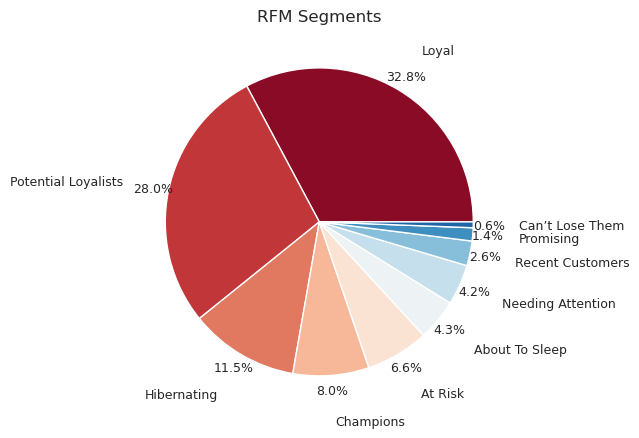

In [209]:
InteractiveShell.ast_node_interactivity = 'last_expr'
fig = plt.figure(figsize=(5,5))
plt.pie(segment_counts, labels=segment_counts.index,
            colors=palette_color[::2], autopct='%1.1f%%', pctdistance=1.1,
            labeldistance=1.3, textprops={'fontsize': 9})
plt.title('RFM Segments')
plt.show()

Text(0, 0.5, 'Count')

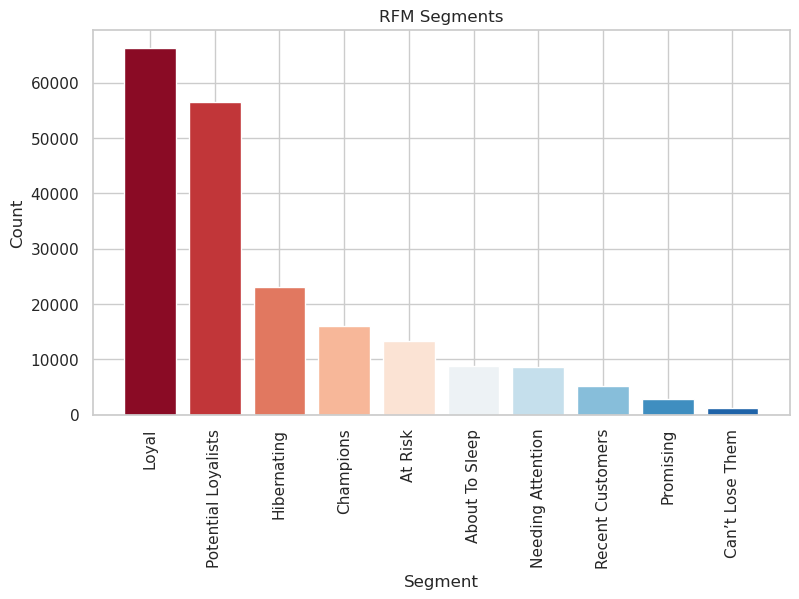

In [210]:
fig = plt.figure(figsize=(9,5))
plt.bar(segment_counts.index,segment_counts.values, color=palette_color[::2])
plt.xticks(rotation = 90)
plt.title('RFM Segments')
plt.xlabel('Segment')
plt.ylabel('Count')

In [211]:
df_Segment = RFM_df.groupby('Segment', as_index=False).agg({'recency':'sum',
                                                            'monetary_value':'sum',
                                                            'frequency':'sum',
                                                            'card_id': 'size'})
df_Segment.columns = ['Segment','Recency sum','Monetary sum', 'Frequency sum', 'Num of Cards']
df_Segment.sort_values(by = 'Monetary sum' , ascending=False)

,Segment,Recency sum,Monetary sum,Frequency sum,Num of Cards
5,Loyal,"4,285,411.2482","1,310,283.3880",10648439,66243
3,Champions,"1,039,265.4845","376,421.8656",2493230,16100
1,At Risk,"918,177.3091","276,237.0008",1861404,13355
7,Potential Loyalists,"3,654,018.5444","202,360.7651",2133726,56508
4,Hibernating,"1,610,638.9774","79,256.8819",729957,23124
9,Recent Customers,"352,961.1610","48,646.5183",465055,5238
6,Needing Attention,"568,145.9626","44,243.7426",488049,8557
0,About To Sleep,"575,194.4801","28,003.2737",188478,8779
8,Promising,"180,828.4510","20,005.5799",201434,2790
2,Can’t Lose Them,"78,842.3283","12,461.4307",36722,1223


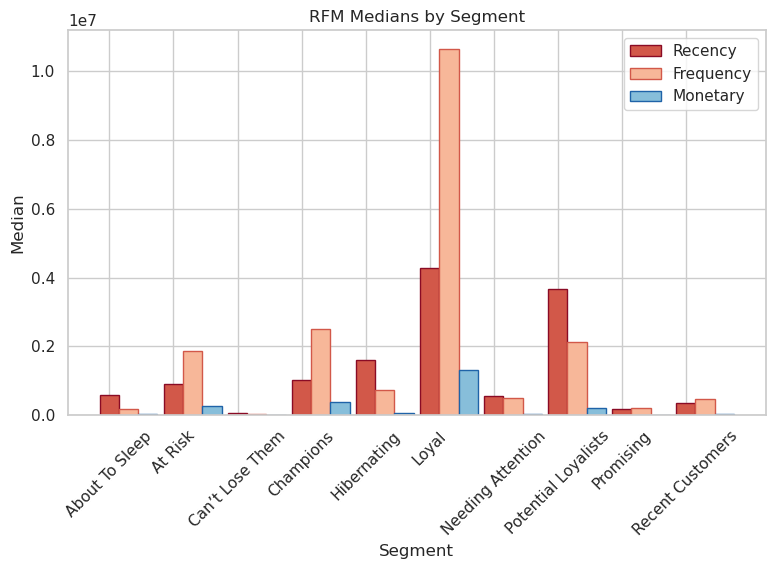

In [214]:
fig = plt.figure(figsize=(9,5))
bar_width = 0.3

# Set the x positions of the bars
r1 = np.arange(len(df_Segment.Segment))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Create the bar chart
plt.bar(r1, df_Segment['Recency sum'], width=bar_width, color=palette_color[3], edgecolor=palette_color[0], label='Recency')
plt.bar(r2, df_Segment['Frequency sum'], width=bar_width, color=palette_color[6], edgecolor= palette_color[3], label='Frequency')
plt.bar(r3, df_Segment['Monetary sum'], width=bar_width, color=palette_color[14], edgecolor=palette_color[18], label='Monetary')

# Add x-axis ticks and labels
plt.xticks([r for r in range(len(df_Segment.Segment))], df_Segment.Segment, rotation=45)

# Set chart title and axis labels
plt.title('RFM Medians by Segment')
plt.xlabel('Segment')
plt.ylabel('Median')

# Add legend
plt.legend()

# Show the chart
plt.show()

<a ><font size="3"><b>OBSERVATION:</b></font></a> Based on the provided data, I can observe the following:

- The `Loyal` segment has the highest total frequency value, indicating that these customers are the most loyal and engaged with the business. They also have a high total recency value, suggesting that they are making frequent and recent purchases.
- The `Champions` segment has the highest total recency value, indicating that these customers are the most recent purchasers. They also have a high total monetary and frequency value, indicating that they are highly engaged with the business.
- The `At Risk` segment has a relatively high total recency value, indicating that these customers are recent purchasersa and a lower total monetary and frequency value compared to other segments. This suggests that they may need to be targeted with specific marketing efforts to encourage them to engage with the business more frequently.
- The `Potential Loyalists` segment has a relatively low total monetary value, suggesting that they may need to be targeted with promotions or incentives to increase their spending.
- The `Recent Customers`, `Lost`, and `Needing Attention` segments have relatively low total values across all metrics, suggesting that these customers may need to be targeted with specific marketing efforts to increase their engagement with the business.
- The `Hibernating`and `About To Sleep` segments have relatively high total recency values, indicating that these customers are recent purchasers, but they have low total monetary and frequency values. This suggests that they may need to be targeted with promotions or incentives to encourage them to engage with the business more frequently.
- The `Promising` and `Can’t Lose Them` segments have a high median recency value, indicating that these customers are at risk of becoming inactive. However, they also have a high median monetary value, suggesting that they are still valuable customers to the business.

In [215]:
seg_map.values()

dict_values(['Champions', 'Loyal', 'Potential Loyalists', 'Recent Customers', 'Promising', 'Needing Attention', 'About To Sleep', 'At Risk', 'Can’t Lose Them', 'Hibernating'])

In [216]:
encoding = {label: i for i, label in zip(range(10, 0, -1),list(seg_map.values()))}

RFM_df['Segment_Encoded'] = RFM_df['Segment'].map(encoding)
RFM_df.Segment.value_counts()

Loyal                  66243
Potential Loyalists    56508
Hibernating            23124
Champions              16100
At Risk                13355
About To Sleep          8779
Needing Attention       8557
Recent Customers        5238
Promising               2790
Can’t Lose Them         1223
Name: Segment, dtype: int64

In [229]:
RFM_df.to_csv('RFM_df.csv', index = False)

---
<h1 style="text-align:center;"><font color = "#2471A3">KMEANS CLUSTERING</font></h1>

---
**Q1 - Our goal is to cluster users based on their spending behaviors. Your task is to perform a clustering analysis leveraging the K-means method.**

#### <font color = "Purple">1- How you select the right "K" for the k-means method?</font>
1. **Elbow method:** By ploting the WCSS as a function of the number of clusters and look for the "elbow" point where the rate of decrease slows down significantly. This elbow point is considered to be the optimal number of clusters.
2. **Silhouette method:** Calculate the average silhouette score for different values of k and choose the value of k that maximizes the average silhouette score.

#### <font color = "Purple">2- How you create features?</font>

I used three types of datasets to create features:
1. **Aggregation:** Grouping the data by CardI and computing summary statistics (such as mean, median, or mode) for each group.
2. **Aggregation and feature reduction:** I took the datafrom the first mehtod, but it also involves reducing the dimensionality of the resulting features using (PCA) By reducing the dimensionality, we can create a smaller set of features that capture the most important information in the data.
3. **RFM:** It involves computing three metrics for each customer: recency (how recently they made a purchase), frequency (how often they make purchases), and monetary value (how much they spend on each purchase).

In [444]:
data1 = pd.read_csv(file_path)
data1.head()

,card_id,trans_month_diff_var,trans_purchase_month_mode,trans_is_weekend_mode,trans_merchant_id_nunique,trans_card_id_size,trans_purchase_date_max_diff_now,trans_purchase_date_min_diff_now,transaction_category_3_mode,merchant_category_1_mode,merchant_category_2_mode,merchant_category_3_mode,merchant_city_id_nunique,merchant_city_id_mode,merchant_state_id_nunique,merchant_state_id_mode,merchant_subsector_id_nunique,merchant_subsector_id_mode,merchant_category_id_nunique,merchant_category_id_mode,most_recent_purchases_range_mode,merchant_numerical_1_bins_mode,installments_mode,month_lag_var,active_months_lag12_var,log_avg_purchases_lag12_mean,score,trans_purchase_amount_var,trans_purchase_amount_median,trans_purchase_amount_sum
0,C_ID_00007093c1,0.0000,0.0012,0.0000,0.0060,0.0294,0.3692,0.4507,0.0004,0.0000,0.0006,0.0000,0.0006,0.0629,0.0004,0.0004,0.0025,0.0037,0.0037,0.0598,0.0002,0.0000,0.0002,0.0024,0.0001,0.0001,0.1340,0.0000,0.0000,0.0055
1,C_ID_0001506ef0,0.0000,0.0022,0.0000,0.0054,0.0127,0.3582,0.4391,0.0006,0.0000,0.0006,0.0002,0.0007,0.0256,0.0006,0.0036,0.0024,0.0062,0.0034,0.1319,0.0009,0.0000,0.0000,0.0034,0.0001,0.0001,0.8843,0.0000,0.0000,0.0019
2,C_ID_000183fdda,0.0000,0.0004,0.0000,0.0171,0.0315,0.3813,0.4353,0.0004,0.0000,0.0006,0.0002,0.0014,0.0327,0.0008,0.0006,0.0043,0.0033,0.0075,0.0746,0.0006,0.0000,0.0002,0.0009,0.0002,0.0002,-0.2644,0.0000,0.0000,0.0058
3,C_ID_00027503e2,0.0000,0.0013,0.0000,0.0023,0.0081,0.3808,0.4265,0.0006,0.0000,0.0006,0.0000,0.0004,0.0281,0.0004,0.0037,0.0012,0.0064,0.0015,0.1359,0.0006,0.0000,0.0000,0.0011,0.0003,0.0002,0.8130,0.0000,0.0000,0.0000
4,C_ID_0002c7c2c1,0.0000,0.0021,0.0000,0.0085,0.0141,0.3698,0.4361,0.0006,0.0000,0.0002,0.0002,0.0010,0.0133,0.0004,0.0017,0.0021,0.0052,0.0041,0.1363,0.0010,0.0000,0.0000,0.0017,0.0003,0.0002,1.2881,0.0000,0.0000,0.0012


In [445]:
target = data1['score']
kmeans_data1 = data1.drop(['score','card_id'], axis = 1)

### Evaluation using Elbow to select best (K)
The KElbowVisualizer class is used to plot the within-cluster sum of squares (WCSS) against the number of clusters specified (in this case, from 2 to 21). The elbow point of the resulting plot is then used to determine the optimal number of clusters.

In [446]:
# credit: tutorial2_part1
from yellowbrick.cluster import KElbowVisualizer

def Opyimize_k_using_Elbow(df, ks = (2, 21)):
    kmeans = KMeans(n_init='auto', init='k-means++')
    visualizer = KElbowVisualizer(kmeans, k=ks)

    visualizer.fit(df)
    visualizer.show()

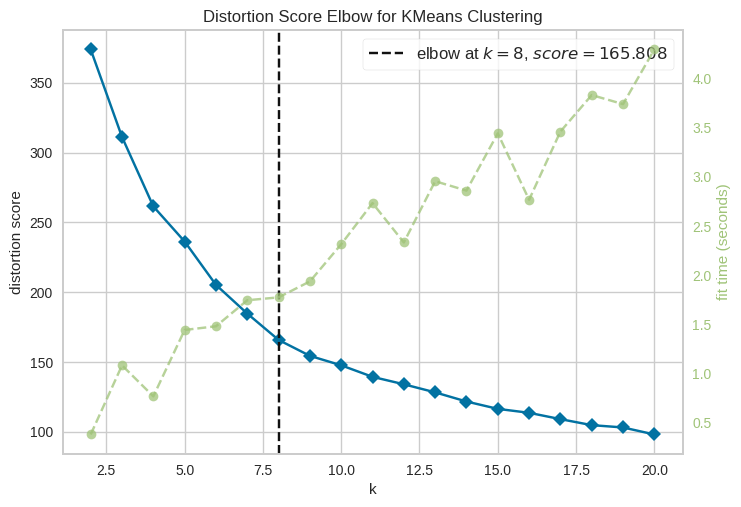

CPU times: user 47.4 s, sys: 4min 14s, total: 5min 2s
Wall time: 1min 16s


In [447]:
%%time
Opyimize_k_using_Elbow(kmeans_data1)

### Performs KMeans clustering and optimizes the number of clusters using Silhouette score
This function performs KMeans clustering on the input data for a range of cluster numbers. It computes the Silhouette score for each clustering solution and visualizes the results using:

1. A silhouette plot showing the Silhouette scores for each sample and cluster.
2. A scatter plot showing the actual clusters formed.

> The optimal number of clusters is determined by examining the silhouette plot and choosing the clustering solution with the highest average Silhouette score.

#### **Inputs:**
- df: The input data to perform clustering on.
- start: The start number of clusters to evaluate (default 3)
- end: The end number of clusters to evaluate (default 8)
- use_PCA: Whether to reduce dimensions using PCA before clustering (default False)

#### **Outputs:**
- Returns the input data `df` with additional columns for cluster assignments from each clustering solution evaluated.

#### **Steps:**
For each number of clusters from start to end:
1. Optionally reduces dimensions using PCA
2. Performs KMeans clustering
3. Computes the Silhouette score
4. Adds cluster assignment column to dataframe

    **Then it:**
    - Plots a silhouette plot showing Silhouette score by sample and cluster
    - Plots a scatter plot showing the actual clusters formed
> The function uses matplotlib to create the plots and visualize the results.

In [465]:
# Resources : https://www.youtube.com/watch?v=DpRPd274-0E + Tutorial2 part1

def Optimize_k_using_Silhouette(df, start = 3, end=8 , use_PCA=False):

    for i, n in enumerate(range(start, end)):
        """
        STEPS:
             1. Initialize the clusterer with n_clusters value and a random generator
             2. seed of 40 for reproducibility.
             3. The silhouette_score gives the average value for all the samples. This gives a perspective into the density and separation of the formed
             4. Plot silhouette graph.
             5. Plot the actual clusters formed in 2D scatter plot.
        """
#################################### Dim Reduction using PCA or T-SNE ##########################
        # Reduce no. of components using PCA
        if use_PCA == True:
            pca = PCA(n_components=3, random_state=42)
            X = pca.fit_transform(df)

            km = KMeans(n_init='auto', init='k-means++',n_clusters=n, max_iter=10,random_state=40)
            labels = km.fit_predict(X)

            df[f"Kmeans_PCA_{n}"] = labels
            silhouette_avg = silhouette_score(X, labels)
            print("For n_clusters =", n,"The average silhouette_score is :", silhouette_avg)
        else:
            km = KMeans(n_init='auto', init='k-means++',n_clusters=n, max_iter=10,random_state=40)
            X = np.array(df)
            labels = km.fit_predict(X)
            silhouette_avg = silhouette_score(df, labels)
            print("For n_clusters =", n,"The average silhouette_score is :", silhouette_avg)
            #  Reduce no. of components using t-SNE to visualize data points
            tsne = TSNE(n_components=2, random_state=42)
            X = tsne.fit_transform(df)
            df[f"Kmeans_{n}"] = labels

######################## The 1st subplot is the silhouette plot ########################
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(14, 4)

        # The silhouette coefficient can range from -1, 1 but in this example all
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        ax1.set_ylim([0, len(X) + (n + 1) * 10])

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, labels)

        y_lower = 10
        for i in range(n):
            # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[labels == i]
            ith_cluster_silhouette_values.sort()
            size_cluster_i = len(ith_cluster_silhouette_values)
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n)

            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10  # 10 for the 0 samples

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color= palette_color[0], linestyle="--")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")
        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

######################### 2nd Plot showing the actual clusters formed ########################
        colors = cm.nipy_spectral(labels.astype(float) / n)
        ax2.scatter(X[:, 0], X[:, 1], marker='o', s=30, lw=0, alpha=0.3, c=colors, edgecolor='k')

        # Labeling the clusters
        centers = km.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor=None)

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n),fontsize=12, fontweight='bold')

    plt.show()
    return df

In [ ]:
%%time
start, end = 3, 8
trail1_results = Optimize_k_using_Silhouette(df= kmeans_data1, start = start, end=end , use_PCA=False);

For n_clusters = 3 The average silhouette_score is : 0.7601198057872937
For n_clusters = 4 The average silhouette_score is : 0.9365798233850479


<a ><font size="3"><b>OBSERVATION:</b></font></a>
A higher silhouette score indicates that the objects are well-matched to their own clusters and poorly-matched to neighboring clusters.
- As I saw from the scatter plot, all centroids located in the same place and also there are some misclassifies samples as shown from the silhouette plot.

 ### Statistics of loyalty scores on aggregated dataset
 I performed some additional analysis following these steps:

 1. Cutcut the score column into bins, with the number of bins equal to the number of clusters (K).
 2. Aggregate the loyalty score by for bin using absolute mean.
 3. Aggregate the loyalty score by for cluster using absolute mean.
 4. Compare the mean scores in each bin to the mean score in the corresponding cluster.

In [ ]:
InteractiveShell.ast_node_interactivity = 'all'

trail1_results['score']=target
trail1_results['Segment'] = RFM_df['Segment_Encoded']

for k in range(start, end):
    stats=pd.DataFrame()
    trail1_results[f'score_with_{k}bins'] = pd.qcut(trail1_results['score'], k, range(0, k))
    stats[f'Mean_score_Kmeans{k}'] = trail1_results.groupby(f'Kmeans_{k}').apply(lambda x:x['score'].abs().mean()).values
    stats[f'Mean_score_bins{k}'] = trail1_results.groupby(f'score_with_{k}bins').apply(lambda x:x['score'].abs().mean()).values
    stats['Diffrance'] = stats[f'Mean_score_Kmeans{k}'] -  stats[f'Mean_score_bins{k}']
    stats.rename_axis("cluster")

<a ><font size="3"><b>OBSERVATION:</b></font></a>
It appears that there is some variation in the mean scores between the original clusters and the bins.
- For example, in the `KMeans_5` solution, the mean score in cluster 0 is 1.5465, while the mean score in bin 0 is 4.0715, which is much higher. This suggests that the data points in bin 0 may be quite different from the rest of the cluster, or that the clustering algorithm may have misclassified some of the data points.

### Train Kmeans on the optimal K clusters
I want to train a KMeans model with a single cluster, you can pass start=k and end=k+1 to the `Optimize_k_using_Silhouette` function. This will run the silhouette analysis for a range of cluster numbers from k to k (inclusive), which will train a KMeans model with a single cluster.

For n_clusters = 5 The average silhouette_score is : 0.4663246912595357


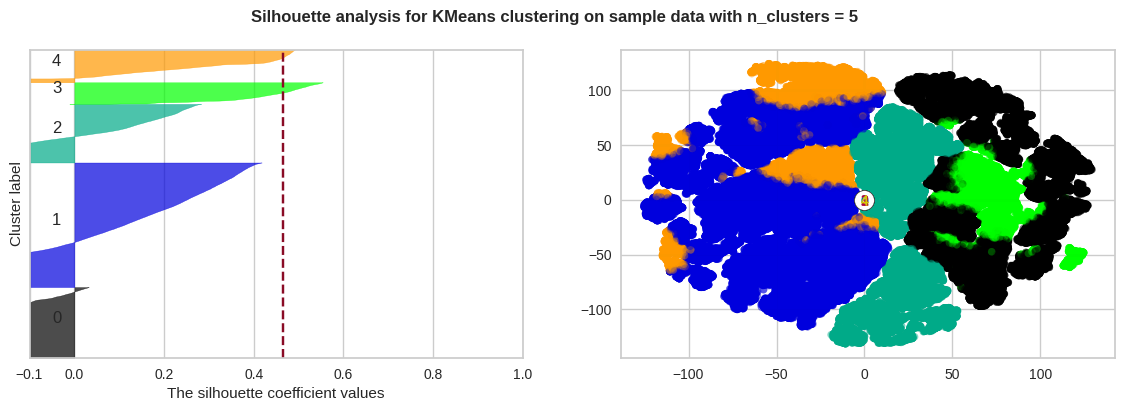

CPU times: user 3h 11min 9s, sys: 6h 17min 50s, total: 9h 29min
Wall time: 2h 27min 56s


In [451]:
%%time
k = 5
trail1_results_final = Optimize_k_using_Silhouette(start=k, end = k+1, df=kmeans_data1, use_PCA=False)

#### <font color = "Purple">3- Explain the resultant clusters (the meaning of each cluster) and judge the quality of resultant clusters. </font>
After many trails and based on the mean loyalty score in the above cell, I found that the best K is 5 which segment the CardHolder as follows:
1. **High-Value Customers: (cluster 0)** This segment consists of customers who spend the most and are responsive to promotions.
2. **Promising Customers: (cluster 4)** This segment consists of customers who have recently made purchases and show potential for becoming loyal customers.
3. **At-Risk Customers: (cluster 1)** This segment consists of customers who have above-average recency, frequency, and monetary values but may be at risk of leaving if not reactivated.
4. **Lost Customers: (cluster 3)** This segment consists of customers who have made big purchases in the past but have not returned in a long time.
5. **Inactive Customers: (cluster 2)**  This segment consists of customers who have not made purchases in a long time and have low recency, frequency, and monetary scores.

### <font color = "Purple">Q2 Based on your results from Q1, report the statistics of loyalty scores for each cluster of users. Report your findings.</font>

 ### Statistics of loyalty scores on aggregated dataset
 I performed some additional analysis following these steps:

 1. Cutcut the score column into bins, with the number of bins equal to the number of clusters (K).
 2. Aggregate the loyalty score by for bin using absolute mean.
 3. Aggregate the loyalty score by for cluster using absolute mean.
 4. Compare the mean scores in each bin to the mean score in the corresponding cluster.

In [ ]:
InteractiveShell.ast_node_interactivity = 'all'

trail1_results_final['score']=target
stats_final=pd.DataFrame()

trail1_results_final[f'score_with_{k}bins'] = pd.qcut(trail1_results_final['score'], k, range(0, k))
stats_final[f'Mean_score_Kmeans{k}'] = trail1_results_final.groupby(f'Kmeans_{k}').apply(lambda x:x['score'].abs().mean()).values
stats_final[f'Mean_score_bins{k}'] = trail1_results_final.groupby(f'score_with_{k}bins').apply(lambda x:x['score'].abs().mean()).values
stats_final['Diffrance'] = stats_final[f'Mean_score_Kmeans{k}'] -  stats_final[f'Mean_score_bins{k}']

stats_final.rename_axis("cluster")

,Mean_score_Kmeans5,Mean_score_bins5,Diffrance
cluster,,,
0,1.5425,4.0715,-2.5291
1,1.4787,0.6847,0.7941
2,1.5496,0.1315,1.4181
3,1.5311,0.5842,0.9470
4,1.5708,2.2405,-0.6698


<a ><font size="3"><b>OBSERVATION:</b></font></a>
There is a significant difference between the mean scores for each cluster indicating that the two methods have significantly different results for this cluster.
- Cluster 2 has the largest difference between the two methods, with a difference of 1.4181.
- Cluster 0 has a significant difference of -2.5291 between the two methods.

---
<h2 style="text-align:center;">Kmeans Clustering using PCA</h2>

---
### <font color = "Purple">Q3 Discuss whether you need to reduce the dimensions to improve clustering performance and build another clustering model (if you believe dimension reduction would help, you can apply it or choose another clustering method) to improve your analysis from Q1.</font>

It may be beneficial to reduce the dimensionality of the data before applying clustering algorithms to avoid the curse of dimensionality, which can cause computational issues and decrease the performance of the clustering algorithm. So, I decided to use PCA to reduce the dim. of the features and also i tries use the dataset produced by RFM.

### PCA Analysis

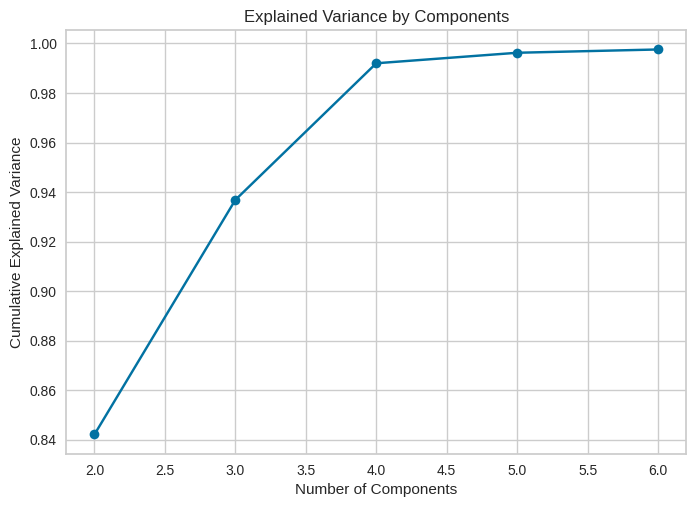

In [307]:
# Define the number of components to try
n_components_list = [2, 3, 4, 5, 6]

# Initialize an empty array to store the explained variance ratios for each number of components
explained_variances = np.zeros(len(n_components_list))

# Loop over the number of components and fit PCA for each number
for i, n_components in enumerate(n_components_list):
    pca = PCA(n_components=n_components, random_state=42)
    data_pca = pca.fit_transform(kmeans_data1)
    explained_variances[i] = sum(pca.explained_variance_ratio_)

# Plot the explained variance ratios as a line chart
plt.plot(n_components_list, explained_variances, '-o')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

<a ><font size="3"><b>OBSERVATION:</b></font></a> I will Choose `n_components=3`

In [464]:
%%time
pca = PCA(n_components=3, random_state=42)
data_pca = pca.fit_transform(kmeans_data1)
pca.explained_variance_ratio_

CPU times: user 7.6 s, sys: 10.1 s, total: 17.7 s
Wall time: 4.41 s


array([0.73345352, 0.18467122, 0.08133601])

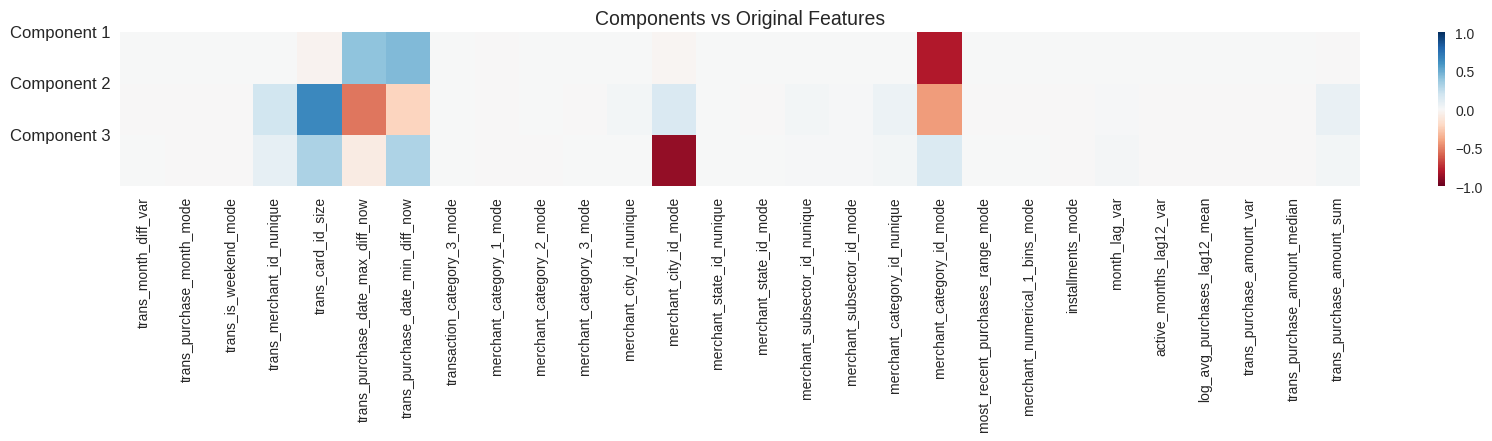

In [438]:
df_pca_comp = pd.DataFrame(data = pca.components_,
                           columns = kmeans_data1.columns,
                           index = ['Component 1', 'Component 2', 'Component 3'])
plt.figure(figsize=(20,2))
sns.heatmap(df_pca_comp,
            vmin = -1,
            vmax = 1,
            cmap = 'RdBu',
            annot = False)
plt.yticks([0, 1, 2], ['Component 1', 'Component 2', 'Component 3'],fontsize = 12)
plt.title('Components vs Original Features',fontsize = 14)
plt.show()

### Choose K Using Elbow and silhouette methods

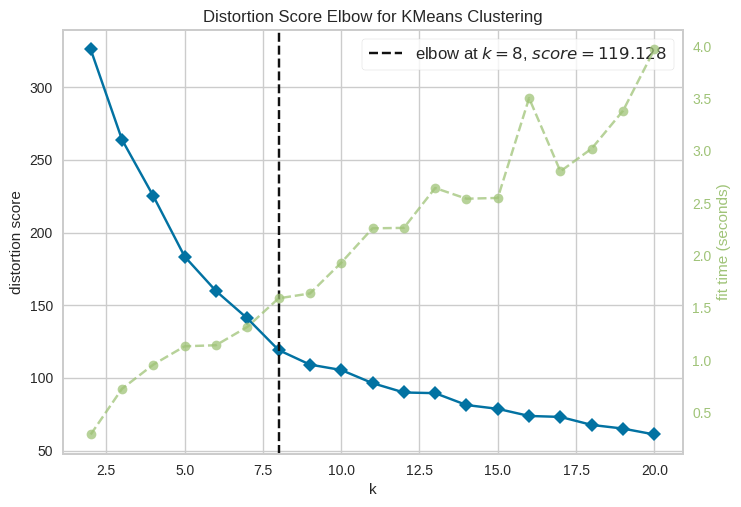

CPU times: user 11.6 s, sys: 4min 6s, total: 4min 17s
Wall time: 1min 5s


In [313]:
%%time
Opyimize_k_using_Elbow(data_pca)

<a ><font size="3"><b>OBSERVATION:</b></font></a> Data reduced using PCA produced lower WCCE in lower time.
- Total time of Elbow Evaluation with orignal dataset = **1.5min** and **Distorion score (WCCE) = 119.128**
- Total time of Elbow Evaluation with PCA dataset = **1.10min** and **Distorion score (WCCE) = 165**

In [314]:
gc.collect()

8592

For n_clusters = 3 The average silhouette_score is : 0.7879787845714725
For n_clusters = 4 The average silhouette_score is : 0.9391147945274703
For n_clusters = 5 The average silhouette_score is : 0.9511848145977801
For n_clusters = 6 The average silhouette_score is : 0.7617684657756224
For n_clusters = 7 The average silhouette_score is : 0.983164538412335


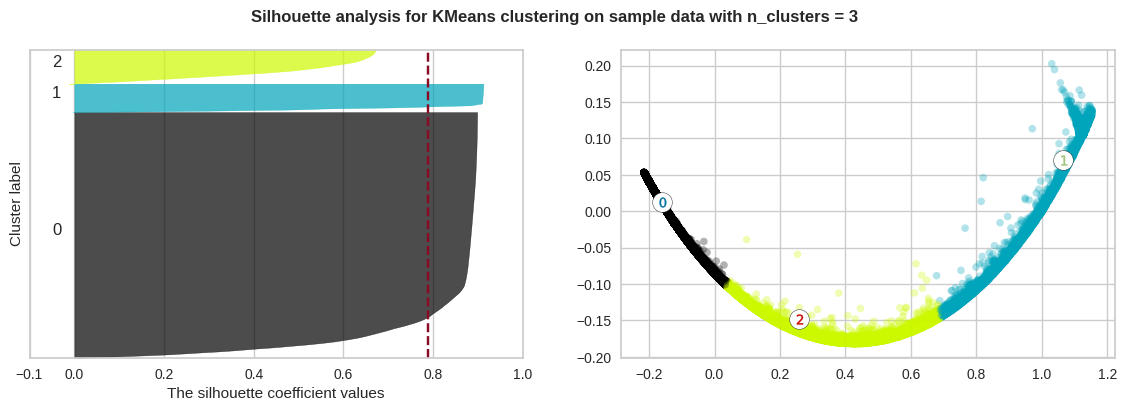

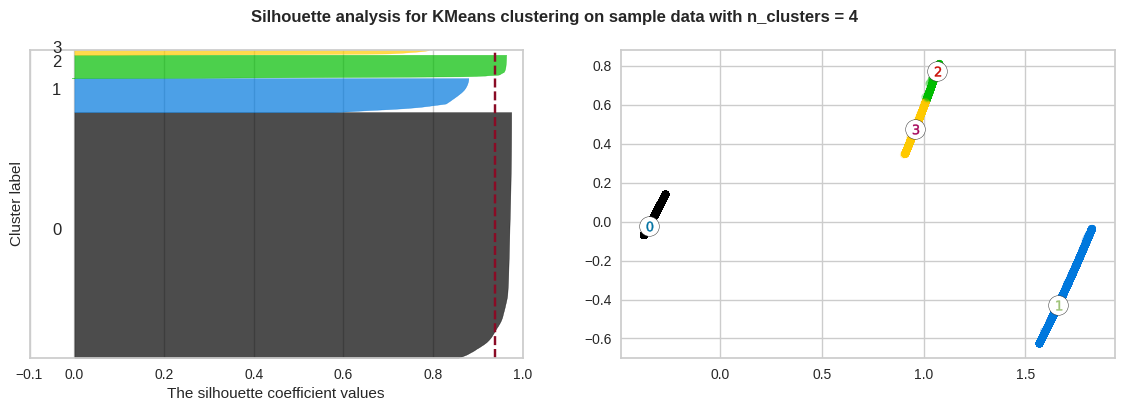

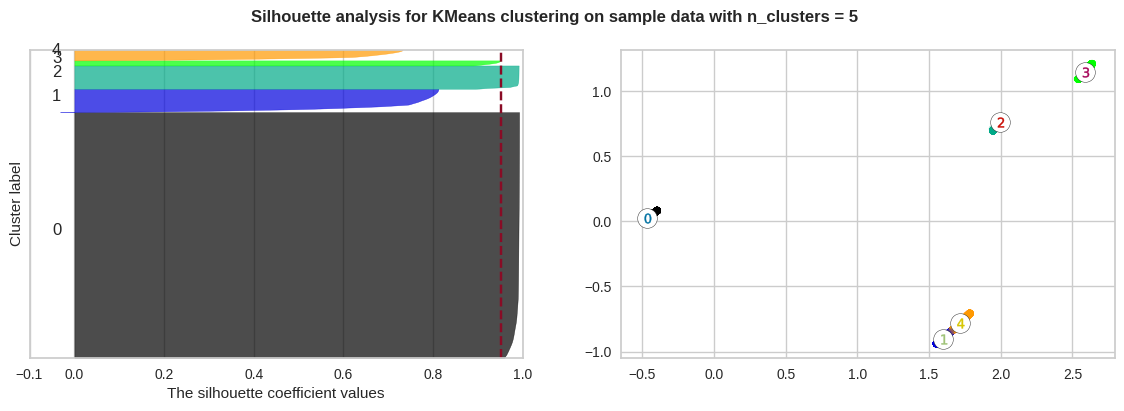

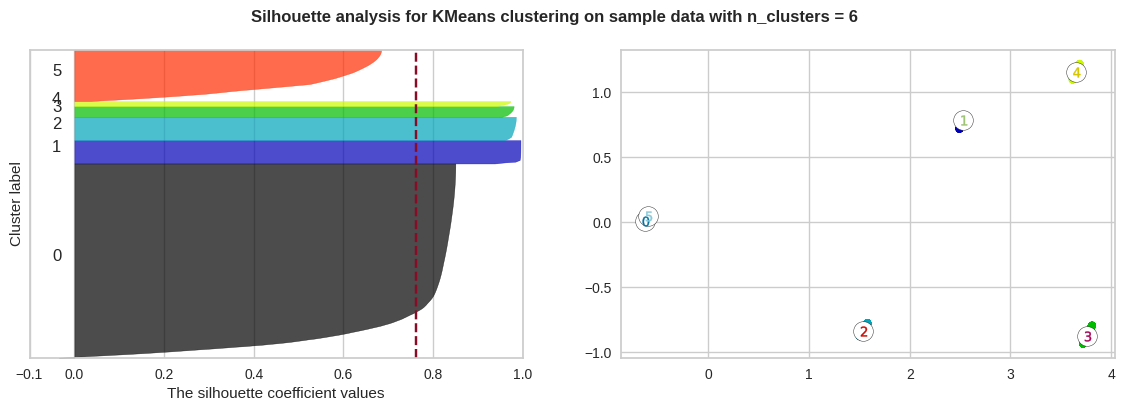

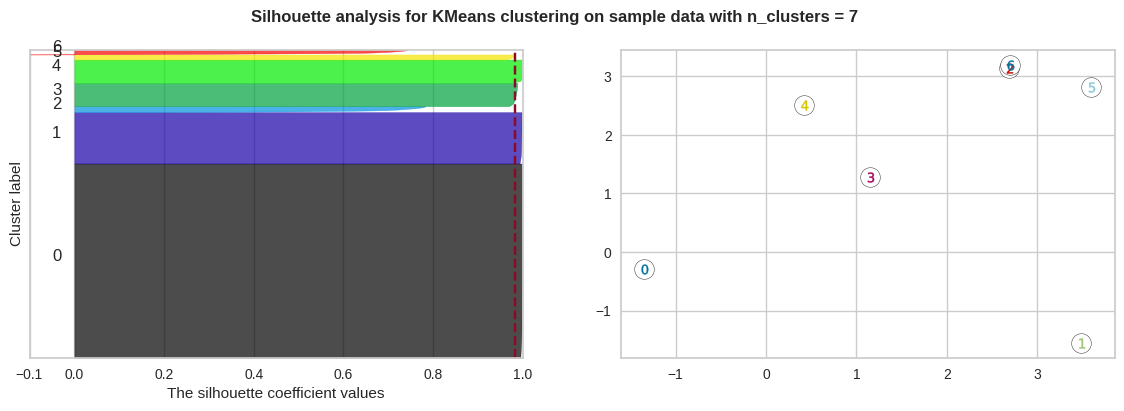

CPU times: user 3h 59min 58s, sys: 5h 33min 2s, total: 9h 33min 1s
Wall time: 1h 41min 11s


In [ ]:
%%time
start, end = 3, 8
PCA_trail_results = ptimize_k_using_Silhouette(df= kmeans_data1, start=start, end=end , use_PCA=True);

<a ><font size="3"><b>OBSERVATION:</b></font></a>
The silhouette scores for the PCA-reduced dataset are generally higher than those for the non-reduced dataset, indicating that the PCA-reduced features are better suited for clustering.
- It appears that the optimal number of clusters for the PCA-reduced dataset is 7, since it has the highest silhouette score but i will use k = 5.

### Statistics of loyalty scores on aggregated dataset with PCA dim. reduction

In [ ]:
InteractiveShell.ast_node_interactivity = 'all'

PCA_trail_results['score']=target

for k in range(start, end):
    PCA_stats=pd.DataFrame()
    PCA_trail_results[f'score_with_{k}bins'] = pd.qcut(PCA_trail_results['score'], k, range(0, k))
    PCA_stats[f'Mean_score_Kmeans_PCA{k}'] = PCA_trail_results.groupby(f'Kmeans_PCA_{k}').apply(lambda x:x['score'].abs().mean()).values
    PCA_stats[f'Mean_score_bins{k}'] = PCA_trail_results.groupby(f'score_with_{k}bins').apply(lambda x:x['score'].abs().mean()).values
    PCA_stats['Diffrance'] = PCA_stats[f'Mean_score_Kmeans_PCA{k}'] -  PCA_stats[f'Mean_score_bins{k}']
    PCA_stats.rename_axis("cluster")

,Mean_score_Kmeans_PCA3,Mean_score_bins3,Diffrance
cluster,,,
0,1.5467,2.7687,-1.2219
1,1.4964,0.2303,1.2661
2,1.5480,1.6266,-0.0786


,Mean_score_Kmeans_PCA4,Mean_score_bins4,Diffrance
cluster,,,
0,1.5467,3.4591,-1.9124
1,1.5480,0.4122,1.1358
2,1.4737,0.3287,1.1450
3,1.6014,1.9697,-0.3683


,Mean_score_Kmeans_PCA5,Mean_score_bins5,Diffrance
cluster,,,
0,1.5467,4.0715,-2.5248
1,1.5832,0.6847,0.8986
2,1.4737,0.1315,1.3423
3,1.6014,0.5842,1.0172
4,1.4707,2.2405,-0.7699


,Mean_score_Kmeans_PCA6,Mean_score_bins6,Diffrance
cluster,,,
0,1.5443,4.6326,-3.0883
1,1.4737,0.9038,0.5700
2,1.5832,0.2672,1.3160
3,1.4707,0.1935,1.2772
4,1.6014,0.7883,0.8131
5,1.5559,2.4649,-0.9090


,Mean_score_Kmeans_PCA7,Mean_score_bins7,Diffrance
cluster,,,
0,1.5443,5.1601,-3.6158
1,1.5559,1.0900,0.4659
2,1.4374,0.4591,0.9783
3,1.5832,0.0914,1.4918
4,1.4737,0.3730,1.1007
5,1.6014,0.9613,0.6401
6,1.5125,2.6584,-1.1459


<a ><font size="3"><b>OBSERVATION:</b></font></a>

- As you increase the number of clusters (K) from 3 to 7, the mean scores of the clusters become more similar. This is expected as with more clusters, the clusters will be more fine-grained and hence have more similar scores.
- This suggests that the K-means clusters may not be capturing much nuance in the data.

### Train Kmeans on the optimal K clusters
I want to train a KMeans model with a single cluster, you can pass start=k and end=k+1 to the `Optimize_k_using_Silhouette` function. This will run the silhouette analysis for a range of cluster numbers from k to k (inclusive), which will train a KMeans model with a single cluster.

For n_clusters = 5 The average silhouette_score is : 0.9995932875953792


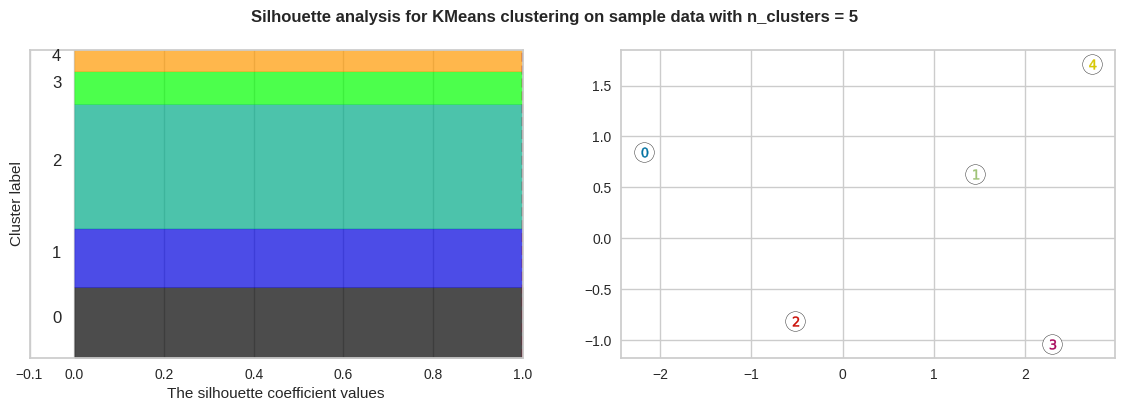

CPU times: user 37min 48s, sys: 1h 13min 27s, total: 1h 51min 15s
Wall time: 33min 50s


In [462]:
%%time
k = 5
PCA_trail_results_final = Optimize_k_using_Silhouette(start=k,end = k+1, df=kmeans_data1, use_PCA=True)

### <font color = "Purple">Explain why the resultant clusters are better than the ones you got in Q1.</font>

The results suggest that applying PCA to the dataset has helped to reduce the dimensionality of the data and identify the most important features that explain the majority of the variance in the data. This has led to better clustering performance and more distinct and well-separated clusters as the variance between the loyalty score is higher than in Q1. The time needed when clustering with PCA is much less than in Q1.

---
<h2 style="text-align:center;">Kmeans Clustering using RFM dataset</h2>

---


In [323]:
RFM_df = pd.read_csv('RFM_df.csv')
RFM_clustering = RFM_df[['recency','frequency','monetary_value']]
RFM_clustering

,recency,frequency,monetary_value
0,64.5764,151,28.1884
1,64.5723,68,10.1632
2,64.5742,155,28.7525
3,65.4469,42,0.2529
4,65.5251,73,5.9793
...,...,...,...
201912,64.5621,190,11.1069
201913,64.6071,219,32.9417
201914,64.5496,115,4.7656
201915,64.5908,198,20.8160


In [320]:
DescriptiveStats(RFM_clustering)

,count,mean,std,min,25%,50%,75%,max,skewness,kurtosis,unique,top,freq
recency,"201,917.0000",65.6878,2.3554,63.6297,64.5496,64.5886,65.5681,76.5991,2.4062,5.2489,"2,014.0000",64.5640,"11,952.0000"
frequency,"201,917.0000",95.3188,106.9107,2.0000,31.0000,60.0000,118.0000,"2,915.0000",3.3206,20.2633,"1,039.0000",22.0000,"2,357.0000"
monetary_value,"201,917.0000",11.8758,16.0167,0.0236,3.2695,6.7967,14.1330,883.0756,6.1369,127.4905,"201,761.0000",0.5265,15.0000


In [324]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
RFM_clustering = pd.DataFrame(scaler.fit_transform(RFM_clustering), columns = ['recency','frequency','monetary_value'])

In [325]:
DescriptiveStats(RFM_clustering)

,count,mean,std,min,25%,50%,75%,max,skewness,kurtosis,unique,top,freq
recency,"201,917.0000",0.1587,0.1816,0.0000,0.0709,0.0739,0.1495,1.0000,2.4062,5.2489,"2,014.0000",0.0720,"11,952.0000"
frequency,"201,917.0000",0.0320,0.0367,0.0000,0.0100,0.0199,0.0398,1.0000,3.3206,20.2633,"1,039.0000",0.0069,"2,357.0000"
monetary_value,"201,917.0000",0.0134,0.0181,0.0000,0.0037,0.0077,0.0160,1.0000,6.1369,127.4905,"201,761.0000",0.0006,15.0000


### Choose K Using Elbow and silhouette methods

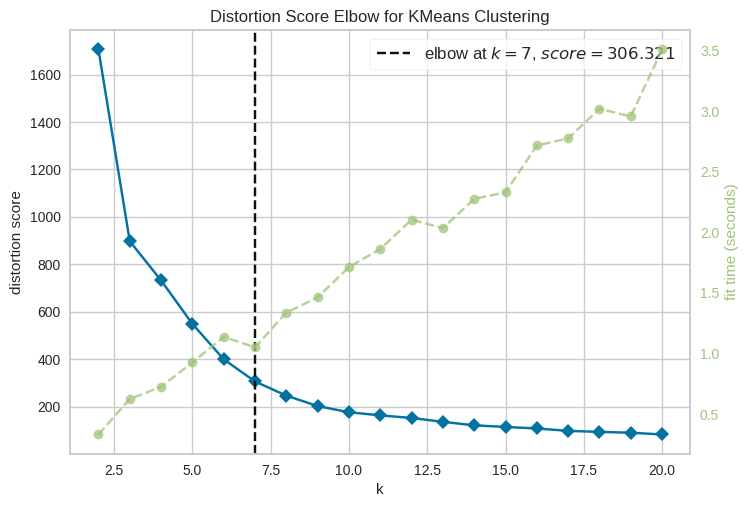

CPU times: user 0 ns, sys: 3min 22s, total: 3min 22s
Wall time: 50.9 s


In [326]:
%%time
Opyimize_k_using_Elbow(RFM_clustering)

<a ><font size="3"><b>OBSERVATION:</b></font></a> Data reduced using PCA produced lower WCCE in lower time.
- Total time of Elbow Evaluation with orignal dataset = **1.5min** and **Distorion score (WCCE) = 119.128**
- Total time of Elbow Evaluation with PCA dataset = **1.10min** and **Distorion score (WCCE) = 165**
- Total time of Elbow Evaluation with RFM dataset = **50.9s** and **Distorion score (WCCE) = 306.321**

In [ ]:
%%time
start, end = 3, 8
RFM_trail_results = Optimize_k_using_Silhouette(df= RFM_clustering, start = start, end=end , use_PCA=False);

For n_clusters = 5 The average silhouette_score is : 0.6077819030391676


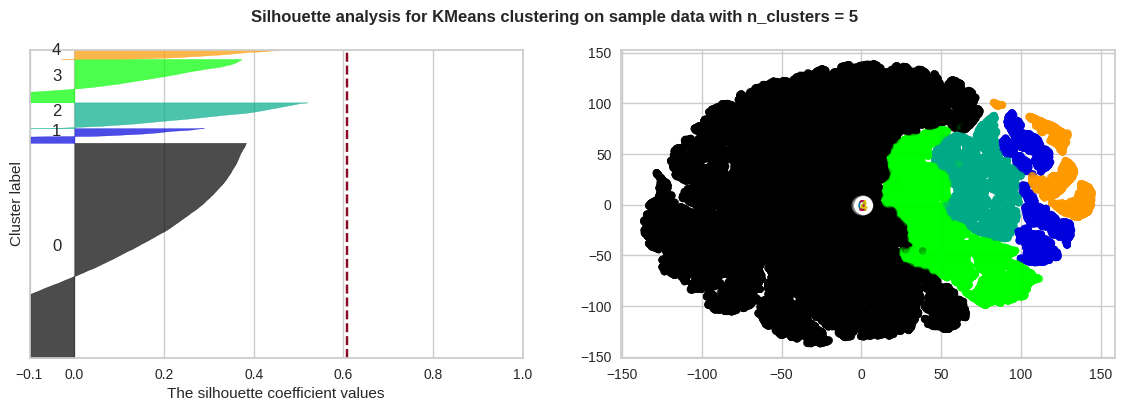

CPU times: user 2h 48min 57s, sys: 6h 1min 44s, total: 8h 50min 41s
Wall time: 2h 19min 11s


In [463]:
%%time
k = 5
RFM_trail_results_final = Optimize_k_using_Silhouette(start=k, end = k+1, df=RFM_clustering, use_PCA=False)

In [ ]:
RFM_trail_results_final['score']=target
RFM_trail_results_final['Segment_Encoded'] = pd.cut(RFM_trail_results_final['Segment_Encoded'], 4, [1,2,3,4])
RFM_stats = RFM_trail_results_final.groupby(f'Kmeans_{k}').agg({'score':'median', 'monetary_value':'mean','frequency':'mean' ,'recency':'mean', 'Segment_Encoded':'mode'})
RFM_stats

,score,monetary_value,frequency,recency
Kmeans_5,,,,
0,-0.0029,11.0359,86.5550,63.3105
1,-0.1743,7.0991,53.3990,66.4780
2,-0.0607,47.8692,448.1269,63.4817
3,-0.2448,25.9453,223.4202,64.5321
4,0.1469,8.3680,58.7002,63.2030


---
<h1 style="text-align:center;"><font color = "#2471A3">PATTERN MINING</font></h1>

---

---
## Patten Mining on the whole Transactions

---

### <font color = "Purple"> Q5 Use frequent pattern mining to find frequently co-occurring transaction types. </font>

In [345]:
merged_df

,card_id,feature_1,feature_2,score,authorized_flag,installments,transaction_category_3,merchant_id,month_lag,purchase_amount,purchase_date,merchant_group_id,merchant_category_id,merchant_subsector_id,merchant_category_1,most_recent_sales_range,most_recent_purchases_range,avg_purchases_lag12,active_months_lag12,merchant_category_3,merchant_city_id,merchant_state_id,merchant_category_2,merchant_numerical_1_bins,log_avg_purchases_lag12,log_merchant_group_id,log_purchase_amount,is_rare_data,purchase_year,purchase_month,purchase_dow,purchase_hour,purchase_part_day,is_weekend,month_diff,year_of_joining,quarter_first_active_month,first_active_month_diff_from_today_in_days
0,C_ID_92a2005557,5,2,-0.8203,1,0.0000,3.0000,M_ID_98b342c0e3,1,-0.4915,2018-03-30 10:30:32,35.0000,80.0000,37.0000,0.0000,5.0000,5.0000,1.2613,12.0000,0.0000,159.0000,9.0000,1.0000,20.0000,0.7715,3.5553,0.2276,0,2018,3,4,10,morning,0,63.6543,2017,2,2209
1,C_ID_92a2005557,5,2,-0.8203,1,0.0000,3.0000,M_ID_28a21ea733,2,-0.6665,2018-04-06 10:55:08,"45,545.0000",80.0000,37.0000,0.0000,2.0000,1.0000,0.8214,5.0000,1.0000,69.0000,9.0000,1.0000,0.0000,0.5441,10.7265,0.0775,0,2018,4,4,10,morning,0,64.4243,2017,2,2209
2,C_ID_92a2005557,5,2,-0.8203,1,0.0000,3.0000,M_ID_20dce166b9,1,-0.6353,2018-03-29 15:38:10,"16,785.0000",278.0000,37.0000,0.0000,3.0000,3.0000,1.1549,12.0000,0.0000,231.0000,9.0000,1.0000,0.0000,0.7210,9.7282,0.1060,0,2018,3,3,15,afternoon,0,63.6871,2017,2,2209
3,C_ID_92a2005557,5,2,-0.8203,1,0.0000,3.0000,M_ID_f7796994d1,2,-0.5811,2018-04-09 13:56:50,"78,720.0000",842.0000,37.0000,0.0000,3.0000,3.0000,0.8790,12.0000,1.0000,69.0000,9.0000,1.0000,5.0000,0.5770,11.2737,0.1536,0,2018,4,0,13,afternoon,0,64.3257,2017,2,2209
4,C_ID_92a2005557,5,2,-0.8203,1,0.0000,3.0000,M_ID_0703c10cc0,1,-0.2961,2018-03-12 16:49:03,"81,548.0000",783.0000,19.0000,0.0000,1.0000,1.0000,0.6763,10.0000,0.0000,188.0000,9.0000,1.0000,0.0000,0.4562,11.3089,0.3722,0,2018,3,0,16,afternoon,0,64.2457,2017,2,2209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19249689,C_ID_92c9984c58,3,1,-1.8594,0,1.0000,2.0000,M_ID_49d4a8510e,-3,-0.5966,2017-11-13 14:24:07,35.0000,224.0000,11.0000,1.0000,5.0000,4.0000,0.6881,12.0000,1.0000,158.0000,15.0000,1.0000,0.0000,0.4636,3.5553,0.1401,0,2017,11,0,14,afternoon,0,64.1554,2017,3,2179
19249690,C_ID_92c9984c58,3,1,-1.8594,1,1.0000,2.0000,M_ID_e5374dabc0,-3,-0.7368,2017-11-23 14:57:11,35.0000,839.0000,29.0000,1.0000,5.0000,5.0000,0.5835,12.0000,1.0000,158.0000,15.0000,1.0000,0.0000,0.3955,3.5553,0.0103,0,2017,11,3,14,afternoon,0,63.8268,2017,3,2179
19249691,C_ID_92c9984c58,3,1,-1.8594,1,1.0000,2.0000,M_ID_e5374dabc0,-6,-0.7180,2017-08-24 17:47:51,35.0000,839.0000,29.0000,1.0000,5.0000,5.0000,0.5835,12.0000,1.0000,158.0000,15.0000,1.0000,0.0000,0.3955,3.5553,0.0286,0,2017,8,3,17,afternoon,0,63.8166,2017,3,2179
19249692,C_ID_92c9984c58,3,1,-1.8594,1,1.0000,2.0000,M_ID_ec24d672a3,-1,-0.7020,2018-01-02 21:39:46,"57,759.0000",561.0000,7.0000,1.0000,5.0000,5.0000,0.5680,12.0000,1.0000,158.0000,15.0000,1.0000,0.0000,0.3850,10.9640,0.0441,0,2018,1,1,21,evening,0,64.5126,2017,3,2179


In [348]:
DescriptiveStats(merged_df[['merchant_subsector_id','merchant_category_id']])

,count,mean,std,min,25%,50%,75%,max,skewness,kurtosis,unique,top,freq
merchant_subsector_id,"19,246,494.0000",25.7741,10.5378,1.0000,19.0000,29.0000,34.0000,41.0000,-0.6974,-0.6947,40.0000,33.0000,"3,525,887.0000"
merchant_category_id,"19,246,494.0000",463.6244,235.4832,2.0000,307.0000,489.0000,705.0000,891.0000,-0.1457,-1.1039,320.0000,705.0000,"3,516,338.0000"


### Pattern Mining Based on `merchant_category_id`

**Why Choosing this feature?**

- It represents the category of the merchant where the transaction occurred (e.g, grocery store, clothing store, restaurant). This can provide more meaningful insights into customer behavior compared to other transaction features.

- The statistics provided show that there are 320 unique `merchant_category_id` values. This means that we can easily compute the support of each transaction type and find frequent co-occurring patterns.

In [369]:
from mlxtend.preprocessing import TransactionEncoder

merged_df['merchant_category_id'] = merged_df['merchant_category_id'].astype(int)
transactions = merged_df.groupby('card_id')['merchant_category_id'].apply(list)
pd.DataFrame(transactions, columns = ['merchant_category_id'])

,merchant_category_id
card_id,
C_ID_00007093c1,"[222, 511, 307, 705, 108, 45, 755, 307, 705, 3..."
C_ID_0001506ef0,"[705, 769, 422, 705, 705, 813, 309, 705, 813, ..."
C_ID_000183fdda,"[367, 45, 367, 68, 489, 489, 607, 528, 80, 422..."
C_ID_00027503e2,"[511, 705, 437, 560, 705, 560, 560, 80, 705, 7..."
C_ID_0002c7c2c1,"[108, 68, 422, 108, 690, 705, 705, 80, 703, 17..."
...,...
C_ID_fffeced303,"[307, 842, 839, 511, 839, 839, 839, 661, 683, ..."
C_ID_fffeed3a89,"[793, 130, 278, 637, 195, 289, 80, 278, 80, 27..."
C_ID_ffff579d3a,"[419, 705, 80, 87, 531, 367, 80, 367, 68, 560,..."


### Encode the data using the TransactionEncoder

In [370]:
TransEncoder = TransactionEncoder()

transactions = transactions.tolist()
trans_array = TransEncoder.fit_transform(transactions)
TransEncoded_df = pd.DataFrame(trans_array, columns=TransEncoder.columns_)
TransEncoded_df

,2,9,11,14,16,18,19,21,31,33,34,36,38,40,45,49,52,53,56,57,59,60,63,67,68,69,71,78,80,81,83,86,87,90,101,105,108,109,110,111,114,115,117,119,126,130,131,140,141,145,...,737,741,743,748,751,755,757,761,763,769,771,774,776,779,780,781,783,790,792,793,795,796,803,805,806,808,813,814,818,819,823,827,829,834,836,839,840,842,843,847,854,873,875,878,879,881,884,885,889,891
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
2,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201912,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,Fals

### Create Apriori model
### <font color = "Purple"> How you pick the min support threshold.</font>

To determine the minimum support threshold, we need to balance the number of frequent itemsets and their significance. Based on the statistics provided, there are 320 unique `merchant_category_id` values, which is a manageable number for frequent pattern mining. A low minimum support threshold may result in a large number of frequent itemsets that are not meaningful, whereas a high minimum support threshold may miss some important co-occurring transaction types.

In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules

min_support = 0.5
frequent_itemsets = apriori(TransEncoded_df, min_support=min_support, use_colnames=True)

# Print the frequent itemsets
print('Frequent itemsets with a minimum support of', min_support)
frequent_itemsets

<a ><font size="3"><b>OBSERVATION:</b></font></a>

- The most frequent category_id is 705, which appears in almost 90% of the transactions. 
- Category_id 367 and 511 also have high support values, appearing in more than 76% and 81% of the transactions, respectively. 
- The itemsets (80, 511) and (80, 367) have high support values, indicating that these combinations of items are frequently purchased together.

In [376]:
# Generate association rules
rules1 = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Sort rules by confidence in descending order
rules1 = rules1.sort_values(['confidence'], ascending=False)
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
120,"(80, 511, 367)",(705),0.5170,0.8995,0.5069,0.9804,1.0900,0.0418,5.1309,0.1709
135,"(511, 307, 367)",(705),0.5191,0.8995,0.5077,0.9779,1.0872,0.0407,4.5569,0.1668
59,"(80, 367)",(705),0.5766,0.8995,0.5631,0.9766,1.0857,0.0445,4.2945,0.1865
30,(560),(705),0.5163,0.8995,0.5037,0.9756,1.0846,0.0393,4.1185,0.1613
84,"(278, 367)",(705),0.5672,0.8995,0.5527,0.9745,1.0833,0.0425,3.9338,0.1777
...,...,...,...,...,...,...,...,...,...,...
50,(705),"(80, 307)",0.8995,0.5421,0.5276,0.5865,1.0819,0.0399,1.1074,0.7533
73,(705),"(307, 278)",0.8995,0.5430,0.5263,0.5851,1.0774,0.0378,1.1014,0.7152
142,(705),"(511, 307, 367)",0.8995,0.5191,0.5077,0.5644,1.0872,0.0407,1.1040,0.7982
129,(705),"(80, 511, 367)",0.8995,0.5170,0.5069,0.5635,1.0900,0.0418,1.1066,0.8212


<a ><font size="3"><b>OBSERVATION:</b></font></a>
There are several rules with high confidence and lift values. For example:

- (80, 511, 367) -> (705) has a lift of 1.09 and a confidence of 0.98, indicating that customers who purchase from merchant_category 80, 511, and 367 together are more likely to also purchase from merchant_category 705. - (80, 367) -> (705) has a lift of 1.09 and a confidence of 0.98, suggesting that customers who purchase from merchant_category 80 and 367 together are also likely to purchase item 705.
- (511, 307, 367) -> (705) with a lift of 1.0872 and a confidence of 0.9779
- (80, 367.0) -> (705) with a lift of 1.0857 and a confidence of 0.9766
- (560) -> (705) with a lift of 1.0846 and a confidence of 0.9756
- (278, 367) -> (705) with a lift of 1.0833 and a confidence of 0.9745

In [406]:
gc.collect()

1050

### <font color = "Purple"> Q6 Redo Q5 by splitting users based on their loyalty scores. The goal is to explore if different frequent patterns exist in users with high/low loyalty scores.</font>

I will use the median method to compute the median score value and split the data into two groups: high score (score > median) and low score (score <= median). 

In [384]:
merged_df['score'].describe()

count   19,246,494.0000
mean            -0.4556
std              3.5813
min            -33.2188
25%             -0.8081
50%             -0.0901
75%              0.5420
max             17.9688
Name: score, dtype: float64

In [387]:
high_loyalty = merged_df[merged_df['score'] >= merged_df['score'].median()]
low_loyalty = merged_df[merged_df['score'] < merged_df['score'].median()]

print(f" Number of transactions in with low loyalty score is : {len(low_loyalty)}")
print(f" Number of transactions in with low loyalty score is : {len(high_loyalty)}")

 Number of transactions in with low loyalty score is : 9623081
 Number of transactions in with low loyalty score is : 9623413


### Pattern Mining Based on `merchant_category_id`

**Why Choosing this feature?**

- It represents the category of the merchant where the transaction occurred (e.g, grocery store, clothing store, restaurant). This can provide more meaningful insights into customer behavior compared to other transaction features.

- The statistics provided show that there are 320 unique `merchant_category_id` values. This means that we can easily compute the support of each transaction type and find frequent co-occurring patterns.

In [441]:
high_transactions = high_loyalty.groupby('card_id')['merchant_category_id'].apply(list)
low_transactions = low_loyalty.groupby('card_id')['merchant_category_id'].apply(list)

### Encode the data using the TransactionEncoder

In [442]:
TransEncoder = TransactionEncoder()

high_transactions = high_transactions.tolist()
high_trans_array = TransEncoder.fit_transform(high_transactions)
high_transEncoded_df = pd.DataFrame(high_trans_array, columns=TransEncoder.columns_)

In [443]:
low_transactions = low_transactions.tolist()
low_trans_array = TransEncoder.fit_transform(low_transactions)
low_transEncoded_df = pd.DataFrame(low_trans_array, columns=TransEncoder.columns_)

### Create Apriori models on the low and high loyalty datasets

In [409]:
min_support = 0.5

frequent_itemsets_high = apriori(high_transEncoded_df, min_support=min_support, use_colnames=True)
frequent_itemsets_low = apriori(low_transEncoded_df, min_support=min_support, use_colnames=True)

print(f'Frequent itemsets with a minimum support of {min_support} for high score customers: \n{frequent_itemsets_high}')

Frequent itemsets with a minimum support of 0.5 for high score customers: 
    support         itemsets
0    0.6558             (80)
1    0.6448            (278)
2    0.7083            (307)
3    0.7479            (367)
4    0.7938            (511)
5    0.5411            (683)
6    0.5190            (690)
7    0.8885            (705)
8    0.5383        (80, 278)
9    0.5215        (80, 307)
10   0.5544        (80, 367)
11   0.5704        (80, 511)
12   0.6275        (80, 705)
13   0.5222       (307, 278)
14   0.5437       (278, 367)
15   0.5574       (278, 511)
16   0.6138       (705, 278)
17   0.5721       (307, 367)
18   0.5926       (307, 511)
19   0.6680       (705, 307)
20   0.6270       (367, 511)
21   0.7108       (705, 367)
22   0.7253       (705, 511)
23   0.5235       (705, 683)
24   0.5200   (80, 705, 278)
25   0.5060   (80, 705, 307)
26   0.5397   (80, 705, 367)
27   0.5504   (80, 705, 511)
28   0.5043  (705, 307, 278)
29   0.5279  (705, 278, 367)
30   0.5360  (705, 278, 51

In [411]:
print(f'Frequent itemsets with a minimum support of {min_support} for low score customers: \n{frequent_itemsets_low}')

Frequent itemsets with a minimum support of 0.5 for low score customers: 
    support              itemsets
0    0.6948                  (80)
1    0.6864                 (278)
2    0.7397                 (307)
3    0.7823                 (367)
4    0.8301                 (511)
5    0.5398                 (560)
6    0.5830                 (683)
7    0.5535                 (690)
8    0.9116                 (705)
9    0.5235                 (884)
10   0.5845             (80, 278)
11   0.5648             (80, 307)
12   0.6012             (80, 367)
13   0.6187             (80, 511)
14   0.6714             (80, 705)
15   0.5660            (307, 278)
16   0.5930            (278, 367)
17   0.6080            (278, 511)
18   0.6605            (705, 278)
19   0.6145            (307, 367)
20   0.6380            (307, 511)
21   0.7052            (705, 307)
22   0.6756            (367, 511)
23   0.5135            (683, 367)
24   0.7515            (705, 367)
25   0.5240            (683, 511)
26   0.7

<a ><font size="3"><b>OBSERVATION:</b></font></a>
these frequent itemsets suggest that there are some similarities and differences in transaction behavior between high and low score customers.
- Merchant Categories (80), (278), (307), (367), and (511) are frequent among both high and low score customers. 
- There are some overlapping itemsets between the two groups, such as Merchant Categories (80, 705), (705, 278), (705, 307), (705, 367), and (705, 511). 
- Merchant Category (683) is a frequent itemset among high score customers but not among low score customers.
- Merchant Category (560) is a frequent itemset among low score customers but not among high score customers.

In [417]:
# Generate association rules
rules_high = association_rules(frequent_itemsets_high, metric="lift", min_threshold=1)

# Sort rules by confidence in descending order
rules_high = rules_high.sort_values(['confidence'], ascending=False)
rules_high.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
17,(278),(705),0.6448,0.8885,0.6138,0.9519,1.0714,0.0409,2.3194,0.1877
90,(367),"(705, 511)",0.7479,0.7253,0.6019,0.8048,1.1096,0.0595,1.4071,0.3918
81,"(705, 511)",(307),0.7253,0.7083,0.5664,0.7810,1.1025,0.0527,1.3316,0.3386
75,"(705, 367)",(307),0.7108,0.7083,0.5543,0.7798,1.1009,0.0508,1.3247,0.3170
5,(367),(80),0.7479,0.6558,0.5544,0.7412,1.1302,0.0639,1.3300,0.4571
6,(80),(511),0.6558,0.7938,0.5704,0.8697,1.0956,0.0497,1.5822,0.2534
37,(278),"(80, 705)",0.6448,0.6275,0.5200,0.8064,1.2851,0.1153,1.9241,0.6245
8,(80),(705),0.6558,0.8885,0.6275,0.9569,1.0770,0.0449,2.5869,0.2078
86,"(705, 367)",(511),0.7108,0.7938,0.6019,0.8468,1.0667,0.0377,1.3458,0.2163
77,(705),"(307, 367)",0.8885,0.5721,0.5543,0.6239,1.0906,0.0460,1.1377,0.7444


In [416]:
# Generate association rules
rules_low = association_rules(frequent_itemsets_low, metric="lift", min_threshold=1)

# Sort rules by confidence in descending order
rules_low = rules_low.sort_values(['confidence'], ascending=False)
rules_low.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
144,"(683, 367)",(705),0.5135,0.9116,0.5058,0.9850,1.0804,0.0377,5.8847,0.1530
156,"(80, 278, 367)",(705),0.5194,0.9116,0.5111,0.9839,1.0793,0.0375,5.4931,0.1528
198,"(80, 511, 367)",(705),0.5440,0.9116,0.5345,0.9825,1.0777,0.0386,5.0547,0.1582
213,"(511, 278, 367)",(705),0.5347,0.9116,0.5247,0.9813,1.0764,0.0373,4.7350,0.1526
227,"(511, 307, 367)",(705),0.5451,0.9116,0.5344,0.9805,1.0755,0.0375,4.5290,0.1543
184,"(80, 307, 511)",(705),0.5120,0.9116,0.5018,0.9800,1.0749,0.0350,4.4100,0.1429
77,"(80, 367)",(705),0.6012,0.9116,0.5890,0.9797,1.0747,0.0409,4.3596,0.1742
150,"(683, 511)",(705),0.5240,0.9116,0.5127,0.9783,1.0732,0.0349,4.0788,0.1432
34,(560),(705),0.5398,0.9116,0.5281,0.9783,1.0731,0.0360,4.0640,0.1480
170,"(80, 278, 511)",(705),0.5315,0.9116,0.5198,0.9780,1.0728,0.0353,4.0224,0.1449


<a ><font size="3"><b>OBSERVATION:</b></font></a>
As the number of antecedent items increases, the support generally decreases but the confidence increases. This makes sense (more specific rules will be less common but more reliable when they do occur).

- The lift scores are close to 1 for most rules, indicating the associations are not much stronger than expected by chance. However, some rules do have lift above 1, showing a modestly stronger relationship.

- The highscore rules have higher support, confidence and lift, indicating stronger associations. These rules involve items 80, 367 and 705.
- The lowscore rules have lower support but higher confidence, leverage and conviction. This suggests they are more specific but less common relationships. These rules tend to have more antecedent items.